<a href="https://colab.research.google.com/github/Ichraf-MOUELHI/Malnutrition/blob/main/IM_Malnutrition_dans_le_monde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJECTIF DE CE NOTEBOOK



<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# URL vers les fichiers CSV hébergés sur GitHub
url_population = 'https://raw.githubusercontent.com/Ichraf-MOUELHI/Malnutrition/refs/heads/main/population.csv'
url_dispo_alimentaire = 'https://raw.githubusercontent.com/Ichraf-MOUELHI/Malnutrition/refs/heads/main/dispo_alimentaire.csv'
url_aide_alimentaire = 'https://raw.githubusercontent.com/Ichraf-MOUELHI/Malnutrition/refs/heads/main/aide_alimentaire.csv'
url_sous_nutrition = 'https://raw.githubusercontent.com/Ichraf-MOUELHI/Malnutrition/refs/heads/main/sous_nutrition.csv'

# Chargement des fichiers directement depuis GitHub
population = pd.read_csv(url_population)
dispo_alimentaire = pd.read_csv(url_dispo_alimentaire)
aide_alimentaire = pd.read_csv(url_aide_alimentaire)
sous_nutrition = pd.read_csv(url_sous_nutrition)

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [107]:
population.describe()

,Année,Valeur
count,1416.000000,1.416000e+03
mean,2015.500000,3.144793e+04
std,1.708428,1.300812e+05
min,2013.000000,7.930000e-01
25%,2014.000000,3.783410e+02
50%,2015.500000,5.126480e+03
75%,2017.000000,1.930666e+04
max,2018.000000,1.427648e+06


In [108]:
#Affichage des dimensions du DataFrame Population
print(f"Le tableau population comporte {population.shape} observation(s) ou ligne(s)".format(population.shape[0]))
print("Le tableau population comporte {} colonne(s)".format(population.shape[1]))

# Ou bien
population.shape

# Ou bien
print(f"Le tableau population comporte {population.shape} observation(s) ou ligne(s)")

Le tableau population comporte (1416, 3) observation(s) ou ligne(s)
Le tableau population comporte 3 colonne(s)
Le tableau population comporte (1416, 3) observation(s) ou ligne(s)


In [109]:
# Affichage du type de données
population.dtypes

,0
Zone,object
Année,int64
Valeur,float64


In [110]:
#Consulter le nombre de colonnes

#La nature des données dans chacune des colonnes : Afficher les premières lignes du dataset :
# 1. Utilisez la fonction head() pour afficher les premières lignes du dataset.
#Cela vous donnera un aperçu des types de données présents dans chaque colonne.
print("Apercu du tableau population", population.head())

#Le nombre de valeurs présentes dans chacune des colonnes


Apercu du tableau population           Zone  Année     Valeur
0  Afghanistan   2013  32269.589
1  Afghanistan   2014  33370.794
2  Afghanistan   2015  34413.603
3  Afghanistan   2016  35383.032
4  Afghanistan   2017  36296.113


In [111]:
# 2. Utilisez la fonction info() pour obtenir des informations détaillées sur chaque colonne du dataset,
#y compris le nom de la colonne, le nombre d'éléments non nuls et le type de données.
print("\nInfo sur le tableau population")
population.info()


Info sur le tableau population
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


Remarque
* les accents et majuscules vont être supprimés des noms de colonnes et vont être renommée pour correspondre aux autres *DataFrame*;
* Etant une donnée qualitative, l'année sera convertie en objet.

In [112]:
# Renommage et formatage noms colonnes
population = (population
    .rename(str.lower, axis = 'columns')
    .rename(columns = {'année':'annee'})
)

# Conversion type année en object
population['annee'] = population['annee'].astype(object)

population.head(3)

,zone,annee,valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603


In [113]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'valeur': 'population'})
population

,zone,annee,population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [114]:
# Standardisation des noms des pays des 2 tables population et disponibilité alimentaire
population.loc[population['zone'] == "Tchéquie", 'zone'] = "Tchéquie (la)"
population.loc[population['zone'] == "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'zone'] = "Royaume-Uni"

In [115]:
#4. Utilisez la fonction value_counts() pour compter les occurrences de chaque valeur dans une colonne spécifique.
#Cela est utile pour comprendre la répartition des catégories dans une colonne catégorielle.
print("\nTableau population")
print("\n", population['zone'].value_counts())
print("\n", population['annee'].value_counts())
print("\n", population['population'].value_counts())


Tableau population

 zone
Afghanistan                               6
Afrique du Sud                            6
Albanie                                   6
Algérie                                   6
Allemagne                                 6
                                         ..
Venezuela (République bolivarienne du)    6
Viet Nam                                  6
Yémen                                     6
Zambie                                    6
Zimbabwe                                  6
Name: count, Length: 236, dtype: int64

 annee
2013    236
2014    236
2015    236
2016    236
2017    236
2018    236
Name: count, dtype: int64

 population
0.801        3
1.609        2
36911.523    1
35694.519    1
4829.473     1
            ..
110.874      1
110.261      1
109.599      1
108.902      1
402.829      1
Name: count, Length: 1413, dtype: int64


In [116]:
#Affichage les 5 premières lignes de la table
print("\nApercu 5 premières lignes du tableau population")
population.head(5)



Apercu 5 premières lignes du tableau population


,zone,annee,population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [117]:
# Vérification présence valeurs NA
population.isna().any()

,0
zone,False
annee,False
population,False


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [118]:
dispo_alimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [119]:
#Afficher les dimensions du dataset
print("Le tableau dispo_alimentaire comporte {} observation(s) ou ligne(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau dispo_alimentaire comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

# Ou bien
dispo_alimentaire.shape

Le tableau dispo_alimentaire comporte 15605 observation(s) ou ligne(s)
Le tableau dispo_alimentaire comporte 18 colonne(s)


(15605, 18)

In [120]:
# Affichage type données
dispo_alimentaire.dtypes

,0
Zone,object
Produit,object
Origine,object
Aliments pour animaux,float64
Autres Utilisations,float64
Disponibilité alimentaire (Kcal/personne/jour),float64
Disponibilité alimentaire en quantité (kg/personne/an),float64
Disponibilité de matière grasse en quantité (g/personne/jour),float64
Disponibilité de protéines en quantité (g/personne/jour),float64
Disponibilité intérieure,float64


In [121]:
# Vérification présence valeurs NA
dispo_alimentaire.isna().any()

,0
Zone,False
Produit,False
Origine,False
Aliments pour animaux,True
Autres Utilisations,True
Disponibilité alimentaire (Kcal/personne/jour),True
Disponibilité alimentaire en quantité (kg/personne/an),True
Disponibilité de matière grasse en quantité (g/personne/jour),True
Disponibilité de protéines en quantité (g/personne/jour),True
Disponibilité intérieure,True


In [122]:
# Formatage noms colonnes : suppression des accents et mettre en miniscule les noms de colonnes
dispo_alimentaire.columns = (dispo_alimentaire.columns
    .str.lower()
    .str.replace('[é,è]', 'e', regex = True)
)
dispo_alimentaire.head()

,zone,produit,origine,aliments pour animaux,autres utilisations,disponibilite alimentaire (kcal/personne/jour),disponibilite alimentaire en quantite (kg/personne/an),disponibilite de matiere grasse en quantite (g/personne/jour),disponibilite de proteines en quantite (g/personne/jour),disponibilite interieure,exportations - quantite,importations - quantite,nourriture,pertes,production,semences,traitement,variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [123]:
# Renommage colonnes
dispo_alimentaire = dispo_alimentaire.rename(
    columns = {
        'aliments pour animaux':'aliments_animaux', 'autres utilisations (non alimentaire)':'autres_utilisations',
        'disponibilite alimentaire (kcal/personne/jour)':'disponibilite_kcal_p_j',
        'disponibilite alimentaire en quantite (kg/personne/an)':'disponibilite_kg_p_an',
        'disponibilite de matiere grasse en quantite (g/personne/jour)':'disponibilite_mg_g_p_j',
        'disponibilite de proteines en quantite (g/personne/jour)':'disponibilite_proteines_g_p_j',
        'disponibilite interieure':'disponibilite_interieure', 'exportations - quantite':'exportations',
        'importations - quantite':'importations', 'variation de stock':'variation_stock'
    }
)

dispo_alimentaire.head()

,zone,produit,origine,aliments_animaux,autres utilisations,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,disponibilite_interieure,exportations,importations,nourriture,pertes,production,semences,traitement,variation_stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


La recherche du taux des valeurs NA (Not Available) en Python est importante pour plusieurs raisons,

* Qualité des données : Le taux des valeurs NA est un indicateur de la qualité des données, Une forte proportion de valeurs manquantes peut indiquer des problèmes dans la collecte, le stockage ou le traitement des données. Cela peut affecter la validité et la fiabilité des analyses réalisées sur ces données.
* Prétraitement des données : Avant de procéder à l'analyse ou à l'apprentissage automatique, il est essentiel de traiter les valeurs manquantes de manière appropriée.
* La connaissance du taux de valeurs NA permet de prendre des décisions éclairées sur la façon de gérer ces données manquantes, en les supprimant, en les imputant (c'est-à-dire en les remplaçant par des valeurs estimées) ou en utilisant d'autres techniques de gestion des données manquantes.
* Imputation de données : Si le taux de valeurs NA est faible, il peut être possible d'imputer les données manquantes de manière fiable en utilisant des méthodes statistiques ou d'apprentissage automatique.
Cela permet de conserver un plus grand nombre d'échantillons pour l'analyse, ce qui peut améliorer la puissance statistique et la représentativité des résultats.
Par exemple, si certaines variables ont un taux élevé de valeurs manquantes, cela peut indiquer qu'elles ne sont pas facilement accessibles ou que leur collecte est sujette à des erreurs

In [124]:
# Affichage taux valeurs NA pour chaque colonne du tableau dispo_alimentaire
# Calculez le taux en pourcentage des valeurs manquantes pour chaque colonne
pourcentage_na = (dispo_alimentaire.isna().sum() / len(dispo_alimentaire)) * 100
# Affichez les taux en pourcentage des valeurs manquantes pour chaque colonne
pourcentage_na

,0
zone,0.000000
produit,0.000000
origine,0.000000
aliments_animaux,82.569689
autres utilisations,64.780519
disponibilite_kcal_p_j,8.740788
disponibilite_kg_p_an,10.189042
disponibilite_mg_g_p_j,24.421660
disponibilite_proteines_g_p_j,25.914771
disponibilite_interieure,1.429029


Analyse des résultats du taux de valeurs NA dans les colonnes
* Recherche des colonnes ayant un taux de Na supérieur à 60%
* Analyser les colonnes par rapport aux données sources pour comprendre la cause
* Eliminer la colonne ou choisir la méthode d'imputation la plus pertinente (remplacement des valeurs par le mode, la moyenne, médiane ...).

les colonnes concernées sont, où presque plus de la moitié des valeurs sont manquantes:
* aliments_animaux
* autres utilisations
* pertes
* semences
* traitement

In [125]:
#4. Utilisez la fonction value_counts() pour compter les occurrences de chaque valeur dans une colonne spécifique.
#Cela est utile pour comprendre la répartition des catégories dans une colonne catégorielle.
print("\nTableau dispo_alimentaire comptage des occurrences de chaque valeur dans une colonne ")

print("\n", dispo_alimentaire['zone'].value_counts())
print("\n", dispo_alimentaire['produit'].value_counts())
print("\n", dispo_alimentaire['origine'].value_counts())
print("\n", dispo_alimentaire['aliments_animaux'].value_counts())
print("\n", dispo_alimentaire['autres utilisations'].value_counts())
print("\n", dispo_alimentaire['disponibilite_kcal_p_j'].value_counts())
print("\n", dispo_alimentaire['disponibilite_kg_p_an'].value_counts())
print("\n", dispo_alimentaire['disponibilite_mg_g_p_j'].value_counts())
print("\n", dispo_alimentaire['disponibilite_proteines_g_p_j'].value_counts())
print("\n", dispo_alimentaire['disponibilite_interieure'].value_counts())
print("\n", dispo_alimentaire['exportations'].value_counts())
print("\n", dispo_alimentaire['importations'].value_counts())
print("\n", dispo_alimentaire['nourriture'].value_counts())
print("\n", dispo_alimentaire['pertes'].value_counts())
print("\n", dispo_alimentaire['production'].value_counts())
print("\n", dispo_alimentaire['semences'].value_counts())
print("\n", dispo_alimentaire['traitement'].value_counts())
print("\n", dispo_alimentaire['variation_stock'].value_counts())


Tableau dispo_alimentaire comptage des occurrences de chaque valeur dans une colonne 

 zone
Inde                                          97
Japon                                         97
Costa Rica                                    96
Chine - RAS de Hong-Kong                      96
Canada                                        96
                                              ..
Timor-Leste                                   61
République populaire démocratique de Corée    61
Afghanistan                                   60
Turkménistan                                  57
Lesotho                                       53
Name: count, Length: 174, dtype: int64

 produit
Abats Comestible          174
Beurre, Ghee              174
Lait - Excl Beurre        174
Boissons Alcooliques      174
Blé                       174
                         ... 
Sucre, betterave          107
Ignames                    80
Sucre non centrifugé       30
Huile de Son de Riz        21
Viande de Anim Aqu

In [126]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)
dispo_alimentaire

,zone,produit,origine,aliments_animaux,autres utilisations,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,disponibilite_interieure,exportations,importations,nourriture,pertes,production,semences,traitement,variation_stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


QUESTIONS :

* multiplication de toutes les lignes contenant des milliers de tonnes en Kg. est ce que je multiplie par 1000 toutes les lignes meme si les valeurs ne sont pas en milliers de tonnes ?
* Fonction pour convertir les valeurs en milliers de tonnes en kilogrammes

In [127]:
# multiplication de toutes les lignes contenant des milliers de tonnes en Kg
# Fonction pour convertir les valeurs en milliers de tonnes en kilogrammes
#def convert_to_kg(value):
    #if isinstance(value, pd.Series):
        #try:
            #return value.astype(float) * 1000000
        #except ValueError:
            #return None
    #else:
        #try:
            #return float(value) * 1000000
        #except ValueError:
            #return None

# Appliquer la fonction de conversion à la colonne 'Quantité'
#dispo_alimentaire['aliments_animaux'] = convert_to_kg(dispo_alimentaire['aliments_animaux'])
#dispo_alimentaire['autres utilisations'] = convert_to_kg(dispo_alimentaire['autres utilisations'])
#dispo_alimentaire['disponibilite_interieure'] = convert_to_kg(dispo_alimentaire['disponibilite_interieure'])
#dispo_alimentaire['exportations'] = convert_to_kg(dispo_alimentaire['exportations'])
#dispo_alimentaire['importations'] = convert_to_kg(dispo_alimentaire['importations'])
#dispo_alimentaire['nourriture'] = convert_to_kg(dispo_alimentaire['nourriture'])
#dispo_alimentaire['pertes'] = convert_to_kg(dispo_alimentaire['pertes'])
#dispo_alimentaire['production'] = convert_to_kg(dispo_alimentaire['production'])
#dispo_alimentaire['semences'] = convert_to_kg(dispo_alimentaire['semences'])
#dispo_alimentaire['traitement'] = convert_to_kg(dispo_alimentaire['traitement'])
#dispo_alimentaire['variation_stock'] = convert_to_kg(dispo_alimentaire['variation_stock'])
# Afficher le DataFrame avec les quantités converties en kilogrammes
#dispo_alimentaire

Vérifier le filtre :
* masque_dispo_kcal_p_j = dispo_alimentaire['disponibilite_kcal_p_j'] > 2

In [128]:
# Faire des masque ou filtres pour filtrer les données qui nous interesssents
# Créer un masque pour la colonne dispo en kcal par jour, étant données qu'on a besoin de 2000 calories par jour on filtre sur les valeurs supérieur à 2
#masque_dispo_kcal_p_j = dispo_alimentaire['disponibilite_kcal_p_j'] > 2

# Appliquer le masque pour obtenir les données filtrées
#donnees_filtrees = dispo_alimentaire[masque_dispo_kcal_p_j]

# Voir le lien suivant HungerMap : https://hungermap.wfp.org/

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [129]:
aide_alimentaire.describe()

,Année,Valeur
count,1475.000000,1475.000000
mean,2014.054237,7481.966780
std,0.946916,23339.531424
min,2013.000000,0.000000
25%,2013.000000,287.500000
50%,2014.000000,1178.000000
75%,2015.000000,4334.500000
max,2016.000000,265013.000000


In [130]:
# Affichage dimensions DataFrame
print("\nLe tableau aide_alimentaire comporte respectivement {} (lignes, colonnes)".format(aide_alimentaire.shape))
# Ou bien
aide_alimentaire.shape


Le tableau aide_alimentaire comporte respectivement (1475, 4) (lignes, colonnes)


(1475, 4)

In [131]:
# Affichage type données
aide_alimentaire.dtypes

,0
Pays bénéficiaire,object
Année,int64
Produit,object
Valeur,int64


* les accents et majuscules vont être supprimés des noms de colonnes et « Pays Bénéficiaire » va être renommée pour correspondre aux autres *DataFrame*;
* étant une donnée qualitative, l'année sera convertie en objet.

In [132]:
#changement du nom de la colonne Pays bénéficiaire par Zone
# Renommage et formatage noms colonnes
aide_alimentaire = (aide_alimentaire
    .rename(columns = {'Pays bénéficiaire':'zone', 'Année':'annee'})
    .rename(str.lower, axis = 'columns')
)

#Conversion type
aide_alimentaire['annee'] = aide_alimentaire['annee'].astype(object)

aide_alimentaire.head()

,zone,annee,produit,valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [133]:
# Vérification présence valeurs NA
aide_alimentaire.isna().any()

,0
zone,False
annee,False
produit,False
valeur,False


In [134]:
# Affichage type données
aide_alimentaire.dtypes

,0
zone,object
annee,object
produit,object
valeur,int64


Le tableau aide_alimentaire : ne comporte aucune valeur manquante

In [135]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,zone,annee,produit,valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [136]:
#Afficher les dimensions du dataset
print("\nLe tableau sous_nutrition comporte respectivement {} (lignes, colonnes)".format(sous_nutrition.shape))
# Ou
sous_nutrition.shape


Le tableau sous_nutrition comporte respectivement (1218, 3) (lignes, colonnes)


(1218, 3)

In [137]:
sous_nutrition.describe()

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2012-2014,<0.1
freq,6,203,120


In [138]:
#Conversion de la colonne sous nutrition en numérique
# Renommage et formatage noms colonnes
sous_nutrition = (sous_nutrition
    .rename(str.lower, axis = 'columns')
    .rename(columns = {'année':'annee'})
)

In [139]:
# Affichage type données
sous_nutrition.dtypes

,0
zone,object
annee,object
valeur,object


In [140]:
# Affichage taux valeurs NA pour chaque colonne du tableau dispo_alimentaire
# Calculez le taux en pourcentage des valeurs manquantes pour chaque colonne
pct_na_sous_nutri = (sous_nutrition.isna().sum() / len(sous_nutrition)) * 100
# Affichez les taux en pourcentage des valeurs manquantes pour chaque colonne
pct_na_sous_nutri

,0
zone,0.000000
annee,0.000000
valeur,48.768473


Près de 50% des valeurs de la colonne « population_sous_nutri » sont manquantes.
Les pays concernés ?

In [141]:
# Affiche aperçu 'zone' ayant valeur 'sous_nutrition' manquante
sous_nutrition.loc[sous_nutrition['valeur'].isna()].groupby('zone')['valeur'].mean().index

Index(['Allemagne', 'Andorre', 'Antigua-et-Barbuda', 'Argentine', 'Australie',
       'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bahreïn', 'Belgique',
       ...
       'Tuvalu', 'Ukraine', 'Uruguay', 'Yémen', 'Zambie', 'Zimbabwe',
       'Érythrée', 'États-Unis d'Amérique', 'Îles Cook', 'Îles Marshall'],
      dtype='object', name='zone', length=101)

  Il existe des informations manquantes aussi bien pour des pays réellement concernés comme le Yémen que pour des pays qui ne le sont pas comme l'Allemagne. ceci aura certainement un impact sur la fiablité de certains résultats.

In [142]:
#Remplacement des valeurs '<0.1' par '0' et conversion type
sous_nutrition['valeur'] = sous_nutrition['valeur'].replace(regex = '<0.1', value = 0)


In [143]:
#Puis remplacement des NaN en 0
sous_nutrition = sous_nutrition.fillna(0)

In [144]:
# Changer le type de données de la colonne de object à float
sous_nutrition['valeur'] = sous_nutrition['valeur'].astype(float)


In [145]:
sous_nutrition.dtypes

,0
zone,object
annee,object
valeur,float64


In [146]:
# Vérification présence valeurs NA
sous_nutrition.isna().any()

,0
zone,False
annee,False
valeur,False


In [147]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={'valeur':'population_sous_nutri'})
sous_nutrition

,zone,annee,population_sous_nutri
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


In [148]:
sous_nutrition.dtypes

,0
zone,object
annee,object
population_sous_nutri,float64


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [149]:
# Affiche années des Dataframe 'population' et 'sous_nutrition'
print(population.annee.unique(), sous_nutrition.annee.unique(), sep = '\n')

[2013 2014 2015 2016 2017 2018]
['2012-2014' '2013-2015' '2014-2016' '2015-2017' '2016-2018' '2017-2019']


L'analyse porte sur l'année 2017, nous allons donc choisir pour la table population l'année 2017 et pour la table sous-nutrition l'année 2016 - 2018.

In [150]:
# Affichage du nombre de zones des Dataframe 'population' et 'sous_nutrition'
print (population['zone'].nunique(), sous_nutrition['zone'].nunique(), sep = '\n')

236
203


Pour la table sous-nutrition 33 pays des 236 de notre jeu données sont manquants. Il faut donc identifier si les zones sans informations représentent une part de population importante.

Le nombre de zones présentes dans le Df population est supérieur à celui de la sous-nutrition. Cela signifie que pour certaines zones/pays, nous n'aurons pas d'information de sous-nutrition.



In [151]:
# Il faut tout d'abord sélectionner uniquement les lignes pour l'année 2017 dans les tableaux concernés : population et sous_nutrition
# Puis faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population_2017 = population.loc[population['annee'] == 2017]

# Sélectionner uniquement les lignes pour l'intervalle 2015-2017 dans le le tableau sous_nutrition
sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition['annee'] == '2016-2018']

In [152]:

# transformation de la colonne population_sous_nutri en float
# Avec l'argument errors='coerce',
# Pandas convertira automatiquement toutes les valeurs qui peuvent être interprétées comme des nombres en nombres,
# tandis que les valeurs qui ne sont pas des nombres seront remplacées par NaN.
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
sous_nutrition_2017.population_sous_nutri = pd.to_numeric(sous_nutrition_2017.population_sous_nutri, errors='coerce')
sous_nutrition_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 4 to 1216
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   zone                   203 non-null    object 
 1   annee                  203 non-null    object 
 2   population_sous_nutri  203 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.3+ KB


<ipython-input-152-cd35e1eb1a94>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sous_nutrition_2017.population_sous_nutri = pd.to_numeric(sous_nutrition_2017.population_sous_nutri, errors='coerce')


Jointure des dataframes sous_nutrition_2017 et population_2017 dans une meme table

In [153]:
population_sous_nutrition_2017 = pd.merge(population_2017,sous_nutrition_2017, how = 'inner', on = ['zone', 'zone'])
population_sous_nutrition_2017

,zone,annee_x,population,annee_y,population_sous_nutri
0,Afghanistan,2017,36296.113,2016-2018,10.5
1,Afrique du Sud,2017,57009.756,2016-2018,3.1
2,Albanie,2017,2884.169,2016-2018,0.1
3,Algérie,2017,41389.189,2016-2018,1.3
4,Allemagne,2017,82658.409,2016-2018,0.0
...,...,...,...,...,...
194,Venezuela (République bolivarienne du),2017,29402.484,2016-2018,8.0
195,Viet Nam,2017,94600.648,2016-2018,6.5
196,Yémen,2017,27834.819,2016-2018,0.0
197,Zambie,2017,16853.599,2016-2018,0.0


A VOIR

In [154]:
population_sous_nutrition_2017 = population_sous_nutrition_2017.drop(columns=["annee_y"])
population_sous_nutrition_2017

,zone,annee_x,population,population_sous_nutri
0,Afghanistan,2017,36296.113,10.5
1,Afrique du Sud,2017,57009.756,3.1
2,Albanie,2017,2884.169,0.1
3,Algérie,2017,41389.189,1.3
4,Allemagne,2017,82658.409,0.0
...,...,...,...,...
194,Venezuela (République bolivarienne du),2017,29402.484,8.0
195,Viet Nam,2017,94600.648,6.5
196,Yémen,2017,27834.819,0.0
197,Zambie,2017,16853.599,0.0


In [155]:
population_sous_nutrition_2017 = population_sous_nutrition_2017.drop(columns=["annee_x"])
population_sous_nutrition_2017

,zone,population,population_sous_nutri
0,Afghanistan,36296.113,10.5
1,Afrique du Sud,57009.756,3.1
2,Albanie,2884.169,0.1
3,Algérie,41389.189,1.3
4,Allemagne,82658.409,0.0
...,...,...,...
194,Venezuela (République bolivarienne du),29402.484,8.0
195,Viet Nam,94600.648,6.5
196,Yémen,27834.819,0.0
197,Zambie,16853.599,0.0


RESULTATS DU NOMBRE DE POPULATION EN SOUS NUTRITION PAR PAYS

In [156]:
# Nombre de valeurs où la valeur est manquante dans la colonne population_sous_nutri
nombre_lignes_zero_pop_sous_nutri = (population_sous_nutrition_2017['population_sous_nutri'] == 0).sum()
print("Nombre de lignes avec valeur zéro :", nombre_lignes_zero_pop_sous_nutri)

Nombre de lignes avec valeur zéro : 116


In [157]:
# Nombre de valeurs où la valeur est manquante dans la colonne population
nombre_lignes_zero_pop = (population_sous_nutrition_2017['population'] == 0).sum()
print("Nombre de lignes avec valeur zéro :", nombre_lignes_zero_pop)

Nombre de lignes avec valeur zéro : 0


In [158]:
# Mise à l'échelle de la population : La population en état de sous-nutrition est exprimée en million et la population totale est quant à elle exprimée en millier. Nous la convertissons donc en million.
population_sous_nutrition_2017['population'] = (population_sous_nutrition_2017['population'] / 1000).round(decimals = 1)
population_sous_nutrition_2017

,zone,population,population_sous_nutri
0,Afghanistan,36.3,10.5
1,Afrique du Sud,57.0,3.1
2,Albanie,2.9,0.1
3,Algérie,41.4,1.3
4,Allemagne,82.7,0.0
...,...,...,...
194,Venezuela (République bolivarienne du),29.4,8.0
195,Viet Nam,94.6,6.5
196,Yémen,27.8,0.0
197,Zambie,16.9,0.0


In [159]:
population_sous_nutrition_2017.isna()

,zone,population,population_sous_nutri
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
194,False,False,False
195,False,False,False
196,False,False,False
197,False,False,False


In [160]:
# calcul de la proportion (%) de personne sous-alimentée par pays
proportion_sous_nutri = round((population_sous_nutrition_2017['population_sous_nutri'] / population_sous_nutrition_2017['population']) * 100, 1)
population_sous_nutrition_2017['proportion_pct (%)'] = proportion_sous_nutri
# Ajoutez un pourcentage à la colonne 'valeur'
# population_sous_nutrition_2017['proportion_pct (%)'] = population_sous_nutrition_2017['proportion_pct (%)'].apply(lambda x: f"{x}%")

In [161]:
population_sous_nutrition_2017

,zone,population,population_sous_nutri,proportion_pct (%)
0,Afghanistan,36.3,10.5,28.9
1,Afrique du Sud,57.0,3.1,5.4
2,Albanie,2.9,0.1,3.4
3,Algérie,41.4,1.3,3.1
4,Allemagne,82.7,0.0,0.0
...,...,...,...,...
194,Venezuela (République bolivarienne du),29.4,8.0,27.2
195,Viet Nam,94.6,6.5,6.9
196,Yémen,27.8,0.0,0.0
197,Zambie,16.9,0.0,0.0


In [162]:
# Pour calculer la proportion de personnes en état de sous-nutrition on va supprimer les pays avec des valeurs manquantes
population_sous_nutrition_sansnan_2017 = population_sous_nutrition_2017.dropna(axis=0)
population_sous_nutrition_sansnan_2017

,zone,population,population_sous_nutri,proportion_pct (%)
0,Afghanistan,36.3,10.5,28.9
1,Afrique du Sud,57.0,3.1,5.4
2,Albanie,2.9,0.1,3.4
3,Algérie,41.4,1.3,3.1
4,Allemagne,82.7,0.0,0.0
...,...,...,...,...
194,Venezuela (République bolivarienne du),29.4,8.0,27.2
195,Viet Nam,94.6,6.5,6.9
196,Yémen,27.8,0.0,0.0
197,Zambie,16.9,0.0,0.0


RESULTAT DIAPO : 1. Proportion de personnes en état de sous-nutrition en 2017

In [163]:
# Proportion totale de personnes en état de sous-nutrition en 2017 pour les 175 pays concernées
sum_population =  round(population_sous_nutrition_sansnan_2017['population'].sum(),1)
sum_sous_nutrition = round(population_sous_nutrition_sansnan_2017['population_sous_nutri'].sum(),1)
pourcentage_total_sous_nutrition = round((sum_sous_nutrition / sum_population) * 100, 1)

print("les 175 pays dont les données sont disponibles comptent ", sum_population, "millions d'individus. Parmi eux,",pourcentage_total_sous_nutrition,"% sont en état de sous-nutrition. Cela représente",sum_sous_nutrition,"millions de personnes")

les 175 pays dont les données sont disponibles comptent  6021.9 millions d'individus. Parmi eux, 8.9 % sont en état de sous-nutrition. Cela représente 534.8 millions de personnes


In [164]:
# Classement des 10 pays comptant le plus de personnes en état de sous-nutrition en 2017
population_sous_nutrition_sansnan_2017.sort_values(by='population_sous_nutri', ascending=False).head(10)

,zone,population,population_sous_nutri,proportion_pct (%)
82,Inde,1338.7,190.1,14.2
134,Pakistan,207.9,24.8,11.9
83,Indonésie,264.7,23.6,8.9
126,Nigéria,190.9,22.8,11.9
16,Bangladesh,159.7,21.5,13.5
59,Éthiopie,106.4,21.1,19.8
142,Philippines,105.2,15.7,14.9
156,République-Unie de Tanzanie,54.7,13.4,24.5
155,République populaire démocratique de Corée,25.4,12.0,47.2
94,Kenya,50.2,11.9,23.7


In [165]:
# Classement des 10 pays ayant le plus de proportion de personnes en état de sous-nutrition en 2017
population_sous_nutrition_sansnan_2017.sort_values(by='proportion_pct (%)', ascending=False).head(10)

,zone,population,population_sous_nutri,proportion_pct (%)
76,Haïti,11.0,5.3,48.2
155,République populaire démocratique de Corée,25.4,12.0,47.2
106,Madagascar,25.6,10.5,41.0
101,Libéria,4.7,1.8,38.3
98,Lesotho,2.1,0.8,38.1
180,Tchad,15.0,5.7,38.0
158,Rwanda,12.0,4.2,35.0
182,Timor-Leste,1.2,0.4,33.3
119,Mozambique,28.6,9.4,32.9
0,Afghanistan,36.3,10.5,28.9


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [166]:
#Combien mange en moyenne un être humain ? Source =>
# L'Organisation Mondiale de la Santé (OMS) précise les besoins énergétiques journaliers pour éviter tout déficit prolongé :
# Au moins 1 800 kilocalories par jour (kcal/j) pour une femme et au moins 2 000 kcal/j pour un homme.
# Ces données sont toutefois relatives et à adapter.

In [167]:
dispo_alimentaire

,zone,produit,origine,aliments_animaux,autres utilisations,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,disponibilite_interieure,exportations,importations,nourriture,pertes,production,semences,traitement,variation_stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


CALCUL DE LA DISPONIBILITE ALIMENTAIRE
* 1- Exploration des dataframes : Population et disponibilité_alimentaires

* La méthode .info() fournit des informations générales sur le DataFrame, notamment :

 - Le nombre total d'entrées (lignes) dans le DataFrame.
 - Le nombre de colonnes.
 - Le nom et le type de données (dtype) de chaque colonne.
 - Le nombre de valeurs non nulles dans chaque colonne.
 - L'utilisation de la mémoire par le DataFrame.
En utilisant ces méthodes, on peu avoir un aperçu rapide des types de données dans le DataFrame, ainsi que du nombre de valeurs manquantes (si elles existent) pour chaque colonne. Cela nous aidera à comprendre la qualité des données et à planifier d'éventuelles étapes de nettoyage ou de traitement.

* La méthode .describe() génère des statistiques descriptives pour les colonnes numériques du DataFrame. Ces statistiques incluent :

- Count : le nombre de valeurs non nulles.
- Mean : la moyenne arithmétique des valeurs.
- Écart type (std) : une mesure de la dispersion des valeurs autour de la moyenne.
- Valeurs minimales et maximales : les valeurs minimale et maximale présentes dans la colonne.
- Quartiles : les valeurs qui divisent les données en quarts (25e, 50e, et 75e percentiles).

En utilisant ces méthodes, vous obtenez un aperçu des tendances centrales et de la dispersion des données numériques dans le DataFrame. Cela peut vous aider à identifier les valeurs aberrantes, à avoir une idée générale de la distribution des données et à décider quels types d'analyses ou de traitements seraient appropriés.


In [168]:
print(dispo_alimentaire.info())
print(dispo_alimentaire.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   zone                           15605 non-null  object 
 1   produit                        15605 non-null  object 
 2   origine                        15605 non-null  object 
 3   aliments_animaux               15605 non-null  float64
 4   autres utilisations            15605 non-null  float64
 5   disponibilite_kcal_p_j         15605 non-null  float64
 6   disponibilite_kg_p_an          15605 non-null  float64
 7   disponibilite_mg_g_p_j         15605 non-null  float64
 8   disponibilite_proteines_g_p_j  15605 non-null  float64
 9   disponibilite_interieure       15605 non-null  float64
 10  exportations                   15605 non-null  float64
 11  importations                   15605 non-null  float64
 12  nourriture                     15605 non-null 

In [169]:
print(population.info())
print(population.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   zone        1416 non-null   object 
 1   annee       1416 non-null   object 
 2   population  1416 non-null   float64
dtypes: float64(1), object(2)
memory usage: 33.3+ KB
None
         population
count  1.416000e+03
mean   3.144793e+04
std    1.300812e+05
min    7.930000e-01
25%    3.783410e+02
50%    5.126480e+03
75%    1.930666e+04
max    1.427648e+06


ECART TYPE (std) permet de determiner :
* Mesure de dispersion : L'écart-type permet de comprendre à quel point les valeurs individuelles d'une colonne diffèrent de la moyenne de cette colonne. Un écart-type élevé indique une dispersion importante des valeurs autour de la moyenne, tandis qu'un écart-type faible indique une dispersion moindre.

* Variabilité des données : Si l'écart-type est élevé, cela peut indiquer que les données sont très variées et que les valeurs sont réparties sur une large plage. En revanche, un faible écart-type suggère que les valeurs sont regroupées plus près de la moyenne, ce qui peut refléter une plus grande cohérence ou uniformité des données.

* Sensibilité aux valeurs aberrantes : L'écart-type est sensible aux valeurs aberrantes (valeurs extrêmes). Si votre DataFrame contient des valeurs aberrantes, elles peuvent influencer considérablement l'écart-type et augmenter sa valeur.

* Interprétation contextuelle : L'interprétation de l'écart-type dépend du contexte des données. Par exemple, si vous analysez les scores de tests d'étudiants, un écart-type plus élevé peut indiquer une plus grande dispersion des performances, tandis qu'un écart-type plus faible peut suggérer une cohérence plus grande entre les résultats.

* Comparaison entre colonnes : Lorsque vous comparez l'écart-type entre différentes colonnes, vous pouvez identifier les colonnes qui ont une variabilité plus importante par rapport à d'autres. Cela peut être utile pour comprendre quelles caractéristiques du DataFrame sont les plus sujettes à des variations.



In [170]:
#suppression des colonnes inutiles

dispo_alimentaire_clear = dispo_alimentaire.drop(columns=[

    "aliments_animaux",
    "origine",
    "autres utilisations",
    "disponibilite_kg_p_an",
    "disponibilite_mg_g_p_j",
    "disponibilite_proteines_g_p_j",
    "disponibilite_interieure",
    "exportations",
    "importations",
    "nourriture",
    "pertes",
    "production",
    "semences",
    "traitement",
    "variation_stock"])
dispo_alimentaire_clear

,zone,produit,disponibilite_kcal_p_j
0,Afghanistan,Abats Comestible,5.0
1,Afghanistan,"Agrumes, Autres",1.0
2,Afghanistan,Aliments pour enfants,1.0
3,Afghanistan,Ananas,0.0
4,Afghanistan,Bananes,4.0
...,...,...,...
15600,Îles Salomon,Viande de Suides,45.0
15601,Îles Salomon,Viande de Volailles,11.0
15602,Îles Salomon,"Viande, Autre",0.0
15603,Îles Salomon,Vin,0.0


In [171]:
print(population_2017.info())
print(population_2017.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 4 to 1414
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   zone        236 non-null    object 
 1   annee       236 non-null    object 
 2   population  236 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.4+ KB
None
         population
count  2.360000e+02
mean   3.198362e+04
std    1.318949e+05
min    7.930000e-01
25%    3.803032e+02
50%    5.203511e+03
75%    1.930842e+04
max    1.421022e+06


In [172]:
# Calcul des sommes des disponibilités alimentaires par pays
# Utilisation de groupby() suivi de .sum() pour agréger par pays
somme_dispo_pays = dispo_alimentaire_clear.groupby('zone').sum()
somme_dispo_pays

,produit,disponibilite_kcal_p_j
zone,,
Afghanistan,"Abats ComestibleAgrumes, AutresAliments pour e...",2087.0
Afrique du Sud,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3020.0
Albanie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3188.0
Algérie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3293.0
Allemagne,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3503.0
...,...,...
Émirats arabes unis,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3275.0
Équateur,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2346.0
États-Unis d'Amérique,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3682.0


In [173]:
# Classement des pays ayant le plus de disponibilité en kcal par personne et par jour
somme_dispo_pays.sort_values(by='disponibilite_kcal_p_j', ascending=False).head(10)

,produit,disponibilite_kcal_p_j
zone,,
Autriche,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3770.0
Belgique,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3737.0
Turquie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3708.0
États-Unis d'Amérique,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3682.0
Israël,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3610.0
Irlande,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3602.0
Italie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3578.0
Luxembourg,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3540.0
Égypte,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3518.0


In [174]:
# jointure entre le dataframe population et Dispo_alimentaire afin d'ajouter dans ce dernier la population pour l'année 2017

dispo_alimentaire_2017 = pd.merge(population_2017,somme_dispo_pays, how='inner', on=['zone', 'zone'])
dispo_alimentaire_2017

,zone,annee,population,produit,disponibilite_kcal_p_j
0,Afghanistan,2017,36296.113,"Abats ComestibleAgrumes, AutresAliments pour e...",2087.0
1,Afrique du Sud,2017,57009.756,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3020.0
2,Albanie,2017,2884.169,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3188.0
3,Algérie,2017,41389.189,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3293.0
4,Allemagne,2017,82658.409,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3503.0
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2633.0
168,Viet Nam,2017,94600.648,"Abats ComestibleAgrumes, AutresAliments pour e...",2744.0
169,Yémen,2017,27834.819,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2217.0
170,Zambie,2017,16853.599,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1924.0


In [175]:
# remise à l'échelle de la population
dispo_alimentaire_2017['population'] = (dispo_alimentaire_2017['population'] * 1000).round(decimals = 1)
dispo_alimentaire_2017

,zone,annee,population,produit,disponibilite_kcal_p_j
0,Afghanistan,2017,36296113.0,"Abats ComestibleAgrumes, AutresAliments pour e...",2087.0
1,Afrique du Sud,2017,57009756.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3020.0
2,Albanie,2017,2884169.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3188.0
3,Algérie,2017,41389189.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3293.0
4,Allemagne,2017,82658409.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3503.0
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2633.0
168,Viet Nam,2017,94600648.0,"Abats ComestibleAgrumes, AutresAliments pour e...",2744.0
169,Yémen,2017,27834819.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2217.0
170,Zambie,2017,16853599.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1924.0


In [176]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
# calcul des dispo alimentaire totales par pays par jour

dispo_kcal_pays = round((dispo_alimentaire_2017['population'] * dispo_alimentaire_2017['disponibilite_kcal_p_j']), 1)
dispo_alimentaire_2017['dispo_kcal_pays'] = dispo_kcal_pays
dispo_alimentaire_2017

,zone,annee,population,produit,disponibilite_kcal_p_j,dispo_kcal_pays
0,Afghanistan,2017,36296113.0,"Abats ComestibleAgrumes, AutresAliments pour e...",2087.0,7.574999e+10
1,Afrique du Sud,2017,57009756.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3020.0,1.721695e+11
2,Albanie,2017,2884169.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3188.0,9.194731e+09
3,Algérie,2017,41389189.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3293.0,1.362946e+11
4,Allemagne,2017,82658409.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3503.0,2.895524e+11
...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2633.0,7.741674e+10
168,Viet Nam,2017,94600648.0,"Abats ComestibleAgrumes, AutresAliments pour e...",2744.0,2.595842e+11
169,Yémen,2017,27834819.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2217.0,6.170979e+10
170,Zambie,2017,16853599.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1924.0,3.242632e+10


In [177]:
#Calcul du nombre d'humains pouvant être nourris sur une base 2000 kcal/j
population_totale = dispo_alimentaire_2017["population"].sum()
kcal_total = dispo_alimentaire_2017["dispo_kcal_pays"].sum()
kcal_mini = 2000
personne_nourrie = round((kcal_total/kcal_mini))
print(personne_nourrie,"individus pourraient être nourries sur une base de 2000 Kcal par jour si l'alimentation disponible était équitablement répartie dans le monde")
# calcul du % de la population totale qui pourrait être nourrie par la disponibilité totale
proportion_personne_nourrie = round((personne_nourrie / population_totale) * 100,1)
print("La proportion de personne qui peuvent etre nourries est de ", proportion_personne_nourrie,"% de la population actuelle")

8344483322 individus pourraient être nourries sur une base de 2000 Kcal par jour si l'alimentation disponible était équitablement répartie dans le monde
La proportion de personne qui peuvent etre nourries est de  140.8 % de la population actuelle


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

DISPONIBILITE ALIMENTAIRE ORIGINE VEGETALE

In [178]:
#Transfert des données avec les végétaux dans un nouveau dataframe
# Création d'un filtre sur les disponibilités végétales
dispo_alimentaire_vegetale = dispo_alimentaire_clear.loc[dispo_alimentaire['origine'] == 'vegetale']
dispo_alimentaire_vegetale

,zone,produit,disponibilite_kcal_p_j
1,Afghanistan,"Agrumes, Autres",1.0
2,Afghanistan,Aliments pour enfants,1.0
3,Afghanistan,Ananas,0.0
4,Afghanistan,Bananes,4.0
6,Afghanistan,Bière,0.0
...,...,...,...
15595,Îles Salomon,Sésame,0.0
15596,Îles Salomon,Thé,0.0
15597,Îles Salomon,Tomates,0.0
15603,Îles Salomon,Vin,0.0


In [179]:
#Calcul du nombre de kcal disponible pour les végétaux
# Calcul des sommes des disponibilités alimentaires par pays
# Utilisation de groupby() suivi de .sum() pour agréger par pays
somme_dispo__vegetale_pays = dispo_alimentaire_vegetale.groupby('zone').sum()
somme_dispo__vegetale_pays

,produit,disponibilite_kcal_p_j
zone,,
Afghanistan,"Agrumes, AutresAliments pour enfantsAnanasBana...",1871.0
Afrique du Sud,"Agrumes, AutresAlcool, non ComestibleAliments ...",2533.0
Albanie,"Agrumes, AutresAlcool, non ComestibleAliments ...",2203.0
Algérie,"Agrumes, AutresAlcool, non ComestibleAliments ...",2915.0
Allemagne,"Agrumes, AutresAlcool, non ComestibleAliments ...",2461.0
...,...,...
Émirats arabes unis,"Agrumes, AutresAlcool, non ComestibleAliments ...",2718.0
Équateur,"Agrumes, AutresAlcool, non ComestibleAliments ...",1732.0
États-Unis d'Amérique,"Agrumes, AutresAlcool, non ComestibleAliments ...",2698.0


In [180]:
# Classement des pays ayant le plus de disponibilité en kcal par personne et par jour avec des produits végétaux
somme_dispo__vegetale_pays.sort_values(by='disponibilite_kcal_p_j', ascending=False).head(10)

,produit,disponibilite_kcal_p_j
zone,,
Égypte,"Agrumes, AutresAlcool, non ComestibleAliments ...",3188.0
Turquie,"Agrumes, AutresAlcool, non ComestibleAliments ...",3141.0
Maroc,"Agrumes, AutresAlcool, non ComestibleAliments ...",3071.0
Tunisie,"Agrumes, AutresAlcool, non ComestibleAliments ...",2971.0
Algérie,"Agrumes, AutresAlcool, non ComestibleAliments ...",2915.0
Cuba,"Agrumes, AutresAlcool, non ComestibleAliments ...",2906.0
Ghana,"Agrumes, AutresAlcool, non ComestibleAliments ...",2874.0
Koweït,"Agrumes, AutresAlcool, non ComestibleAliments ...",2794.0
Israël,"Agrumes, AutresAlcool, non ComestibleAliments ...",2793.0


In [181]:
# Classement des pays ayant le moins de disponibilité en kcal par personne et par jour avec des produits végétaux
somme_dispo__vegetale_pays.sort_values(by='disponibilite_kcal_p_j', ascending=True).head(10)

,produit,disponibilite_kcal_p_j
zone,,
Antigua-et-Barbuda,"Agrumes, AutresAlcool, non ComestibleAliments ...",1635.0
République centrafricaine,"Alcool, non ComestibleAliments pour enfantsAna...",1673.0
Mongolie,"Agrumes, AutresAlcool, non ComestibleAliments ...",1679.0
Équateur,"Agrumes, AutresAlcool, non ComestibleAliments ...",1732.0
Bolivie (État plurinational de),"Agrumes, AutresAlcool, non ComestibleAliments ...",1790.0
Zambie,"Agrumes, AutresAlcool, non ComestibleAliments ...",1818.0
Sainte-Lucie,"Agrumes, AutresAlcool, non ComestibleAliments ...",1820.0
Saint-Kitts-et-Nevis,"Agrumes, AutresAlcool, non ComestibleAliments ...",1821.0
Soudan,"Agrumes, AutresAlcool, non ComestibleAliments ...",1824.0


In [182]:
# jointure des 2 tables dispo vegetale et population
dispo_vegetale = pd.merge(population_2017,somme_dispo__vegetale_pays, how='inner', on=['zone', 'zone'])
dispo_vegetale

,zone,annee,population,produit,disponibilite_kcal_p_j
0,Afghanistan,2017,36296.113,"Agrumes, AutresAliments pour enfantsAnanasBana...",1871.0
1,Afrique du Sud,2017,57009.756,"Agrumes, AutresAlcool, non ComestibleAliments ...",2533.0
2,Albanie,2017,2884.169,"Agrumes, AutresAlcool, non ComestibleAliments ...",2203.0
3,Algérie,2017,41389.189,"Agrumes, AutresAlcool, non ComestibleAliments ...",2915.0
4,Allemagne,2017,82658.409,"Agrumes, AutresAlcool, non ComestibleAliments ...",2461.0
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,"Agrumes, AutresAlcool, non ComestibleAliments ...",2157.0
168,Viet Nam,2017,94600.648,"Agrumes, AutresAliments pour enfantsAnanasArac...",2169.0
169,Yémen,2017,27834.819,"Agrumes, AutresAlcool, non ComestibleAliments ...",2028.0
170,Zambie,2017,16853.599,"Agrumes, AutresAlcool, non ComestibleAliments ...",1818.0


In [183]:
# remise à l'échelle de la population
dispo_vegetale['population'] = (dispo_vegetale['population'] * 1000).round(decimals = 1)
dispo_vegetale

,zone,annee,population,produit,disponibilite_kcal_p_j
0,Afghanistan,2017,36296113.0,"Agrumes, AutresAliments pour enfantsAnanasBana...",1871.0
1,Afrique du Sud,2017,57009756.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",2533.0
2,Albanie,2017,2884169.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",2203.0
3,Algérie,2017,41389189.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",2915.0
4,Allemagne,2017,82658409.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",2461.0
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",2157.0
168,Viet Nam,2017,94600648.0,"Agrumes, AutresAliments pour enfantsAnanasArac...",2169.0
169,Yémen,2017,27834819.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",2028.0
170,Zambie,2017,16853599.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",1818.0


In [184]:
# calcul des dispo alimentaire vegetales totales par pays par jour

dispo_vege_kcal = round((dispo_vegetale['population'] * dispo_vegetale['disponibilite_kcal_p_j']), 1)
dispo_vegetale['dispo_vege_kcal'] = dispo_vege_kcal
dispo_vegetale

,zone,annee,population,produit,disponibilite_kcal_p_j,dispo_vege_kcal
0,Afghanistan,2017,36296113.0,"Agrumes, AutresAliments pour enfantsAnanasBana...",1871.0,6.791003e+10
1,Afrique du Sud,2017,57009756.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",2533.0,1.444057e+11
2,Albanie,2017,2884169.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",2203.0,6.353824e+09
3,Algérie,2017,41389189.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",2915.0,1.206495e+11
4,Allemagne,2017,82658409.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",2461.0,2.034223e+11
...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",2157.0,6.342116e+10
168,Viet Nam,2017,94600648.0,"Agrumes, AutresAliments pour enfantsAnanasArac...",2169.0,2.051888e+11
169,Yémen,2017,27834819.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",2028.0,5.644901e+10
170,Zambie,2017,16853599.0,"Agrumes, AutresAlcool, non ComestibleAliments ...",1818.0,3.063984e+10


In [185]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux sur une base 2000 kcal/j
pop_totale_vege = dispo_vegetale["population"].sum()
kcal_vege_total = dispo_vegetale["dispo_vege_kcal"].sum()
pers_nourrie_vege = round((kcal_vege_total/kcal_mini))
print(pers_nourrie_vege," est le nombre de personnes qui pourraient être nourries sur une base de 2000 Kcal par jour si l'alimentation végétale était équitablement répartie dans le monde")

# calcul du % de la population totale qui pourrait être nourrie par la disponibilité végétale
proportion_personne_nourrie_vege = round((pers_nourrie_vege / pop_totale_vege) * 100,1)
print("La proportion de personnes qui pourraient être nourries avec des produits végétaux uniquement est de ", proportion_personne_nourrie_vege,"% de la population totale")

6999621287  est le nombre de personnes qui pourraient être nourries sur une base de 2000 Kcal par jour si l'alimentation végétale était équitablement répartie dans le monde
La proportion de personnes qui pourraient être nourries avec des produits végétaux uniquement est de  118.1 % de la population totale


DISPONIBILITE ANIMALE

In [186]:
dispo_alimentaire

,zone,produit,origine,aliments_animaux,autres utilisations,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,disponibilite_interieure,exportations,importations,nourriture,pertes,production,semences,traitement,variation_stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
#Transfert des données avec les produits animaux dans un nouveau dataframe
# Création d'un filtre sur les disponibilités animale
dispo_alimentaire_animale = dispo_alimentaire_clear.loc[dispo_alimentaire['origine'] == 'animale']
dispo_alimentaire_animale

,zone,produit,disponibilite_kcal_p_j
0,Afghanistan,Abats Comestible,5.0
5,Afghanistan,"Beurre, Ghee",23.0
11,Afghanistan,Crème,3.0
19,Afghanistan,Graisses Animales Crue,12.0
29,Afghanistan,Lait - Excl Beurre,100.0
...,...,...,...
15598,Îles Salomon,Viande d'Ovins/Caprins,1.0
15599,Îles Salomon,Viande de Bovins,27.0
15600,Îles Salomon,Viande de Suides,45.0
15601,Îles Salomon,Viande de Volailles,11.0


In [188]:
#Calcul du nombre de kcal disponible pour les produits animaux
# Calcul des sommes des disponibilités alimentaires animale par pays
# Utilisation de groupby() suivi de .sum() pour agréger par pays
somme_dispo__animale_pays = dispo_alimentaire_animale.groupby('zone').sum()
somme_dispo__animale_pays

,produit,disponibilite_kcal_p_j
zone,,
Afghanistan,"Abats ComestibleBeurre, GheeCrèmeGraisses Anim...",216.0
Afrique du Sud,Abats ComestibleAnimaux Aquatiques AutreBeurre...,487.0
Albanie,Abats ComestibleAnimaux Aquatiques AutreBeurre...,985.0
Algérie,Abats ComestibleAnimaux Aquatiques AutreBeurre...,378.0
Allemagne,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1042.0
...,...,...
Émirats arabes unis,Abats ComestibleAnimaux Aquatiques AutreBeurre...,557.0
Équateur,Abats ComestibleAnimaux Aquatiques AutreBeurre...,614.0
États-Unis d'Amérique,Abats ComestibleAnimaux Aquatiques AutreBeurre...,984.0


In [189]:
# Classement des pays ayant le plus de disponibilité en kcal par personne et par jour avec des produits animaux
somme_dispo__animale_pays.sort_values(by='disponibilite_kcal_p_j', ascending=False).head(10)

,produit,disponibilite_kcal_p_j
zone,,
Islande,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1497.0
Chine - RAS de Hong-Kong,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1316.0
Finlande,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1313.0
Danemark,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1194.0
France,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1183.0
Belgique,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1175.0
Luxembourg,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1174.0
Autriche,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1137.0
Suisse,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1125.0


In [190]:
# Classement des pays ayant le moins de disponibilité en kcal par personne et par jour avec des produits animaux
somme_dispo__animale_pays.sort_values(by='disponibilite_kcal_p_j', ascending=True).head(10)

,produit,disponibilite_kcal_p_j
zone,,
Rwanda,"Abats ComestibleBeurre, GheeCephalopodesCrusta...",63.0
Togo,Abats ComestibleAnimaux Aquatiques AutreBeurre...,93.0
Libéria,Abats ComestibleAnimaux Aquatiques AutreBeurre...,101.0
Mozambique,Abats ComestibleAnimaux Aquatiques AutreBeurre...,103.0
Nigéria,"Abats ComestibleBeurre, GheeCephalopodesCrusta...",104.0
Zambie,"Abats ComestibleBeurre, GheeCephalopodesCrusta...",106.0
Bangladesh,Abats ComestibleAnimaux Aquatiques AutreBeurre...,108.0
Côte d'Ivoire,Abats ComestibleAnimaux Aquatiques AutreBeurre...,114.0
Tchad,Abats ComestibleAnimaux Aquatiques AutreBeurre...,118.0


In [191]:
# jointure des 2 tables dispo animale et population
dispo_animale = pd.merge(population_2017,somme_dispo__animale_pays, how='inner', on=['zone', 'zone'])
dispo_animale

,zone,annee,population,produit,disponibilite_kcal_p_j
0,Afghanistan,2017,36296.113,"Abats ComestibleBeurre, GheeCrèmeGraisses Anim...",216.0
1,Afrique du Sud,2017,57009.756,Abats ComestibleAnimaux Aquatiques AutreBeurre...,487.0
2,Albanie,2017,2884.169,Abats ComestibleAnimaux Aquatiques AutreBeurre...,985.0
3,Algérie,2017,41389.189,Abats ComestibleAnimaux Aquatiques AutreBeurre...,378.0
4,Allemagne,2017,82658.409,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1042.0
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,Abats ComestibleAnimaux Aquatiques AutreBeurre...,476.0
168,Viet Nam,2017,94600.648,Abats ComestibleAnimaux Aquatiques AutreBeurre...,575.0
169,Yémen,2017,27834.819,Abats ComestibleAnimaux Aquatiques AutreBeurre...,189.0
170,Zambie,2017,16853.599,"Abats ComestibleBeurre, GheeCephalopodesCrusta...",106.0


In [192]:
somme_dispo__animale_pays

,produit,disponibilite_kcal_p_j
zone,,
Afghanistan,"Abats ComestibleBeurre, GheeCrèmeGraisses Anim...",216.0
Afrique du Sud,Abats ComestibleAnimaux Aquatiques AutreBeurre...,487.0
Albanie,Abats ComestibleAnimaux Aquatiques AutreBeurre...,985.0
Algérie,Abats ComestibleAnimaux Aquatiques AutreBeurre...,378.0
Allemagne,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1042.0
...,...,...
Émirats arabes unis,Abats ComestibleAnimaux Aquatiques AutreBeurre...,557.0
Équateur,Abats ComestibleAnimaux Aquatiques AutreBeurre...,614.0
États-Unis d'Amérique,Abats ComestibleAnimaux Aquatiques AutreBeurre...,984.0


In [193]:
# remise à l'échelle de la population
dispo_animale['population'] = (dispo_animale['population'] * 1000).round(decimals = 1)
dispo_animale

,zone,annee,population,produit,disponibilite_kcal_p_j
0,Afghanistan,2017,36296113.0,"Abats ComestibleBeurre, GheeCrèmeGraisses Anim...",216.0
1,Afrique du Sud,2017,57009756.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,487.0
2,Albanie,2017,2884169.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,985.0
3,Algérie,2017,41389189.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,378.0
4,Allemagne,2017,82658409.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1042.0
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,476.0
168,Viet Nam,2017,94600648.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,575.0
169,Yémen,2017,27834819.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,189.0
170,Zambie,2017,16853599.0,"Abats ComestibleBeurre, GheeCephalopodesCrusta...",106.0


In [194]:
# calcul des dispo alimentaire animales totales par pays par jour
dispo_animale_kcal = round((dispo_animale['population'] * dispo_animale['disponibilite_kcal_p_j']), 1)
dispo_animale['dispo_animale_kcal'] = dispo_animale_kcal
dispo_animale

,zone,annee,population,produit,disponibilite_kcal_p_j,dispo_animale_kcal
0,Afghanistan,2017,36296113.0,"Abats ComestibleBeurre, GheeCrèmeGraisses Anim...",216.0,7.839960e+09
1,Afrique du Sud,2017,57009756.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,487.0,2.776375e+10
2,Albanie,2017,2884169.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,985.0,2.840906e+09
3,Algérie,2017,41389189.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,378.0,1.564511e+10
4,Allemagne,2017,82658409.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,1042.0,8.613006e+10
...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,476.0,1.399558e+10
168,Viet Nam,2017,94600648.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,575.0,5.439537e+10
169,Yémen,2017,27834819.0,Abats ComestibleAnimaux Aquatiques AutreBeurre...,189.0,5.260781e+09
170,Zambie,2017,16853599.0,"Abats ComestibleBeurre, GheeCephalopodesCrusta...",106.0,1.786481e+09


In [195]:
#Calcul du nombre d'humains pouvant être nourris avec des produits animaux sur une base 2000 kcal/j
pop_totale_animal = dispo_animale["population"].sum()
kcal_anim_total = dispo_animale["dispo_animale_kcal"].sum()
pers_nourrie_animaux = round((kcal_anim_total/kcal_mini))
print(pers_nourrie_animaux," est le nombre de personnes qui pourraient être nourries sur une base de 2000 Kcal par jour si l'alimentation végétale était équitablement répartie dans le monde")

# calcul du % de la population totale qui pourrait être nourrie par la disponibilité végétale
proportion_personne_nourrie_animaux = round((pers_nourrie_animaux / pop_totale_animal) * 100,1)
print("La proportion de personnes qui pourraient être nourries avec des produits animaux uniquement est de ", proportion_personne_nourrie_animaux,"% de la population totale")

1344862035  est le nombre de personnes qui pourraient être nourries sur une base de 2000 Kcal par jour si l'alimentation végétale était équitablement répartie dans le monde
La proportion de personnes qui pourraient être nourries avec des produits animaux uniquement est de  22.7 % de la population totale


CONSTAT

1344862035  est le nombre de personnes qui pourraient être nourries sur une base de 2000 Kcal par jour si l'alimentation végétale était équitablement répartie dans le monde
La proportion de personnes qui pourraient être nourries avec des produits animaux uniquement est de  22.7 % de la population totale. Alors que 6999621287 de personnes qui pourraient être nourries sur une base de 2000 Kcal par jour si l'alimentation végétale était équitablement répartie dans le monde
La proportion de personnes qui pourraient être nourries avec des produits végétaux uniquement est de  118.1 % de la population totale.

On pourrait en déduire que la consommation de viande, n'est profitable que pour 23% de la population. En plus l'élevage des animaux nécessite une quantité de produits végétaux et surtout de céréales qui serait suffisante pour nourrir la plupart de la population en sous-nutrition.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); "> Calcul des disponibilités par pays pour 2017 </h3>
</div>

In [196]:
dispo_alimentaire

,zone,produit,origine,aliments_animaux,autres utilisations,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,disponibilite_interieure,exportations,importations,nourriture,pertes,production,semences,traitement,variation_stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
# Calcul des sommes de disponibilité alimentaires par pays
# création d'un tableau croisé dynamique
tcd_dispo_aliment_pays = pd.pivot_table(data=dispo_alimentaire,index=['zone'],aggfunc="sum")
tcd_dispo_aliment_pays

,aliments_animaux,autres utilisations,disponibilite_interieure,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,exportations,importations,nourriture,origine,pertes,production,produit,semences,traitement,variation_stock
zone,,,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,13515.0,2087.0,351.41,33.50,58.26,278.0,2988.0,10735.0,animalevegetalevegetalevegetalevegetaleanimale...,1135.0,11171.0,"Abats ComestibleAgrumes, AutresAliments pour e...",395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,61256.0,3020.0,564.80,83.58,85.33,11674.0,7517.0,29812.0,animalevegetalevegetalevegetalevegetaleanimale...,2193.0,63263.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",253.0,22819.0,2153.0
Albanie,660.0,174.0,4758.0,3188.0,1095.54,106.48,111.37,94.0,933.0,3476.0,animalevegetalevegetalevegetalevegetaleanimale...,276.0,3964.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",55.0,113.0,-45.0
Algérie,4352.0,1707.0,42630.0,3293.0,809.13,76.48,91.92,655.0,17403.0,31729.0,animalevegetalevegetalevegetalevegetaleanimale...,3753.0,26359.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",449.0,637.0,-479.0
Allemagne,30209.0,7711.0,162275.0,3503.0,957.52,141.62,101.39,57431.0,65353.0,79238.0,animalevegetalevegetalevegetalevegetaleanimale...,3781.0,154547.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,11850.0,3275.0,700.24,87.16,104.51,4343.0,15327.0,6548.0,animalevegetalevegetalevegetalevegetaleanimale...,705.0,1192.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3.0,804.0,-327.0
Équateur,1200.0,1909.0,18614.0,2346.0,544.91,94.64,61.30,8002.0,1725.0,8574.0,animalevegetalevegetalevegetalevegetaleanimale...,707.0,24337.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,777992.0,3682.0,1002.39,161.37,109.42,163524.0,81887.0,320889.0,animalevegetalevegetalevegetalevegetaleanimale...,7162.0,894668.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",10403.0,141010.0,-35032.0


In [198]:
# Jointure avec la table population
dispo_alimentaire_population_2017 = pd.merge(population_2017,tcd_dispo_aliment_pays, left_on= "zone", right_on= "zone")
dispo_alimentaire_population_2017

,zone,annee,population,aliments_animaux,autres utilisations,disponibilite_interieure,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,exportations,importations,nourriture,origine,pertes,production,produit,semences,traitement,variation_stock
0,Afghanistan,2017,36296.113,768.0,415.0,13515.0,2087.0,351.41,33.50,58.26,278.0,2988.0,10735.0,animalevegetalevegetalevegetalevegetaleanimale...,1135.0,11171.0,"Abats ComestibleAgrumes, AutresAliments pour e...",395.0,63.0,-368.0
1,Afrique du Sud,2017,57009.756,5309.0,876.0,61256.0,3020.0,564.80,83.58,85.33,11674.0,7517.0,29812.0,animalevegetalevegetalevegetalevegetaleanimale...,2193.0,63263.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",253.0,22819.0,2153.0
2,Albanie,2017,2884.169,660.0,174.0,4758.0,3188.0,1095.54,106.48,111.37,94.0,933.0,3476.0,animalevegetalevegetalevegetalevegetaleanimale...,276.0,3964.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",55.0,113.0,-45.0
3,Algérie,2017,41389.189,4352.0,1707.0,42630.0,3293.0,809.13,76.48,91.92,655.0,17403.0,31729.0,animalevegetalevegetalevegetalevegetaleanimale...,3753.0,26359.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",449.0,637.0,-479.0
4,Allemagne,2017,82658.409,30209.0,7711.0,162275.0,3503.0,957.52,141.62,101.39,57431.0,65353.0,79238.0,animalevegetalevegetalevegetalevegetaleanimale...,3781.0,154547.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,2878.0,335.0,32287.0,2633.0,652.86,82.44,72.96,62.0,9604.0,19853.0,animalevegetalevegetalevegetalevegetaleanimale...,1190.0,23868.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",91.0,7957.0,-1130.0
168,Viet Nam,2017,94600.648,11356.0,3815.0,95134.0,2744.0,574.84,72.11,81.61,22638.0,9217.0,52700.0,animalevegetalevegetalevegetaleanimalevegetale...,6743.0,108275.0,"Abats ComestibleAgrumes, AutresAliments pour e...",1211.0,19311.0,278.0
169,Yémen,2017,27834.819,210.0,72.0,9782.0,2217.0,375.41,47.81,58.90,719.0,6786.0,9162.0,animalevegetalevegetalevegetalevegetaleanimale...,269.0,4125.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",67.0,39.0,-408.0
170,Zambie,2017,16853.599,408.0,69.0,10041.0,1924.0,350.12,42.05,55.22,675.0,380.0,5088.0,animalevegetalevegetalevegetalevegetalevegetal...,242.0,10526.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",76.0,4178.0,-182.0


In [199]:
dispo_alimentaire_population_2017['population'] = (dispo_alimentaire_population_2017['population'] * 1000).round(decimals = 1)
dispo_alimentaire_population_2017

,zone,annee,population,aliments_animaux,autres utilisations,disponibilite_interieure,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,exportations,importations,nourriture,origine,pertes,production,produit,semences,traitement,variation_stock
0,Afghanistan,2017,36296113.0,768.0,415.0,13515.0,2087.0,351.41,33.50,58.26,278.0,2988.0,10735.0,animalevegetalevegetalevegetalevegetaleanimale...,1135.0,11171.0,"Abats ComestibleAgrumes, AutresAliments pour e...",395.0,63.0,-368.0
1,Afrique du Sud,2017,57009756.0,5309.0,876.0,61256.0,3020.0,564.80,83.58,85.33,11674.0,7517.0,29812.0,animalevegetalevegetalevegetalevegetaleanimale...,2193.0,63263.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",253.0,22819.0,2153.0
2,Albanie,2017,2884169.0,660.0,174.0,4758.0,3188.0,1095.54,106.48,111.37,94.0,933.0,3476.0,animalevegetalevegetalevegetalevegetaleanimale...,276.0,3964.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",55.0,113.0,-45.0
3,Algérie,2017,41389189.0,4352.0,1707.0,42630.0,3293.0,809.13,76.48,91.92,655.0,17403.0,31729.0,animalevegetalevegetalevegetalevegetaleanimale...,3753.0,26359.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",449.0,637.0,-479.0
4,Allemagne,2017,82658409.0,30209.0,7711.0,162275.0,3503.0,957.52,141.62,101.39,57431.0,65353.0,79238.0,animalevegetalevegetalevegetalevegetaleanimale...,3781.0,154547.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,2878.0,335.0,32287.0,2633.0,652.86,82.44,72.96,62.0,9604.0,19853.0,animalevegetalevegetalevegetalevegetaleanimale...,1190.0,23868.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",91.0,7957.0,-1130.0
168,Viet Nam,2017,94600648.0,11356.0,3815.0,95134.0,2744.0,574.84,72.11,81.61,22638.0,9217.0,52700.0,animalevegetalevegetalevegetaleanimalevegetale...,6743.0,108275.0,"Abats ComestibleAgrumes, AutresAliments pour e...",1211.0,19311.0,278.0
169,Yémen,2017,27834819.0,210.0,72.0,9782.0,2217.0,375.41,47.81,58.90,719.0,6786.0,9162.0,animalevegetalevegetalevegetalevegetaleanimale...,269.0,4125.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",67.0,39.0,-408.0
170,Zambie,2017,16853599.0,408.0,69.0,10041.0,1924.0,350.12,42.05,55.22,675.0,380.0,5088.0,animalevegetalevegetalevegetalevegetalevegetal...,242.0,10526.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",76.0,4178.0,-182.0


In [200]:
# suppression de l'annee
# dispo_alimentaire_population_2017 = dispo_alimentaire_population_2017.drop(columns=["annee"])
# dispo_alimentaire_population_2017

3.4 - Utilisation de la disponibilité intérieure

Rappel sur la definition de la disponibilite_interieure
disponibilite_interieure = (aliments_animaux + autres_utilisations + nourriture + pertes + semences + traitement).

On va faire la somme de chaque catégorie et afficher la répartition dans un graphique.

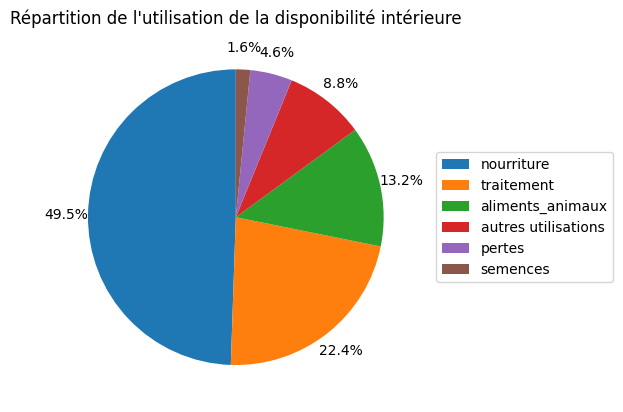

In [201]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

#Transfert des données avec disponibilité intérieure dans un nouveau dataframe
#Création d'un filtre sur les disponibilité intérieure
#   filter_dispo_intérieure = dispo_alimentaire[['zone', 'disponibilite_interieure']]
#   filter_dispo_intérieure

# Création DataFrame 'filter_dispo_intérieure' et traçage graphique
filter_dispo_intérieure = (dispo_alimentaire[['aliments_animaux', 'autres utilisations', 'nourriture', 'pertes', 'semences', 'traitement']]
    .sum()
    .sort_values(ascending = False)
)
plt.pie(filter_dispo_intérieure.values, autopct = '%.1f%%', pctdistance = 1.15, startangle = 90) # Now plt is defined and can be used
plt.title('Répartition de l\'utilisation de la disponibilité intérieure')
plt.legend(filter_dispo_intérieure.index, loc = 7, bbox_to_anchor=(1.54, 0.5))
plt.show()

Seule la moitié de la disponibilité est utilisée avec certitude pour l'alimentation humaine, alors que les pertes et les aliments pour animaux représentent presque 20 % du total.
Pour aller plus loin, faisons le même travail mais en ciblant dans un premier temps les produits d'origine végétale puis en zoomant spécifiquement sur les céréales.

In [202]:
# Somme des valeurs par colonne
filter_dispo_intérieure_pays = dispo_alimentaire.groupby('zone').sum()
categorie_dispo_interieur = filter_dispo_intérieure_pays[['aliments_animaux', 'autres utilisations', 'nourriture', 'pertes', 'semences', 'traitement']]
categorie_dispo_interieur

,aliments_animaux,autres utilisations,nourriture,pertes,semences,traitement
zone,,,,,,
Afghanistan,768.0,415.0,10735.0,1135.0,395.0,63.0
Afrique du Sud,5309.0,876.0,29812.0,2193.0,253.0,22819.0
Albanie,660.0,174.0,3476.0,276.0,55.0,113.0
Algérie,4352.0,1707.0,31729.0,3753.0,449.0,637.0
Allemagne,30209.0,7711.0,79238.0,3781.0,1551.0,39842.0
...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,6548.0,705.0,3.0,804.0
Équateur,1200.0,1909.0,8574.0,707.0,138.0,6200.0
États-Unis d'Amérique,148432.0,154699.0,320889.0,7162.0,10403.0,141010.0


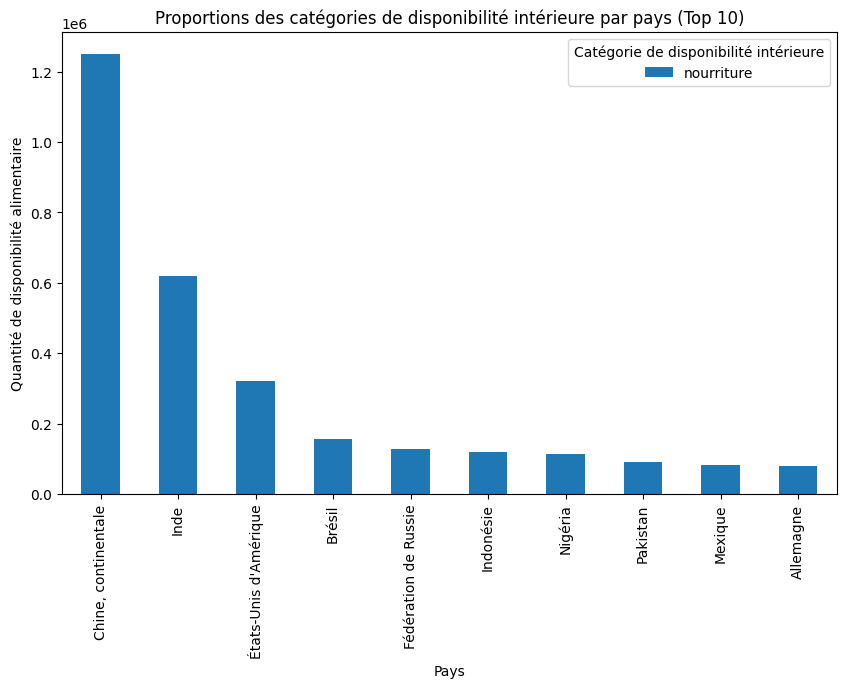

In [203]:
# Calculez la proportion totale par pays
proportion_pays = categorie_dispo_interieur.groupby('zone').sum()

# Triez les pays en fonction de la proportion totale (par exemple, 'nourriture' dans cet exemple)
top_10_pays = proportion_pays.sort_values(by='nourriture', ascending=False).head(10)

# Créez un graphique à barres empilées pour les 10 premiers pays
Proportion_dispo_int_pays = top_10_pays.plot(kind='bar', stacked=True, figsize=(10, 6), y='nourriture')

# Personnalisation du graphique
plt.title('Proportions des catégories de disponibilité intérieure par pays (Top 10)')
plt.xlabel('Pays')
plt.ylabel('Quantité de disponibilité alimentaire')
plt.legend(title='Catégorie de disponibilité intérieure')
plt.show()

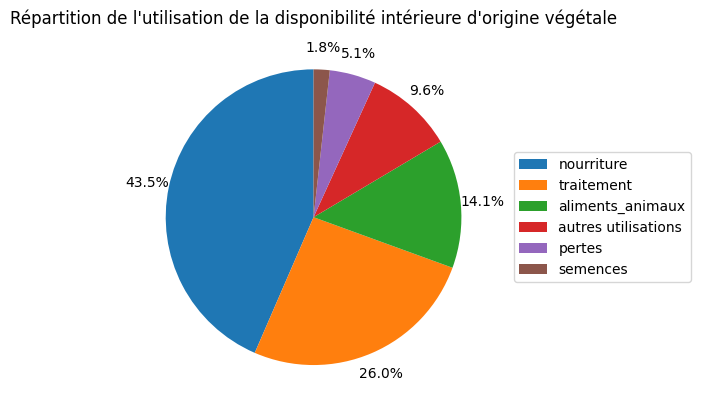

In [204]:
# Création DataFrame 'utilisation_disponibilite_vegetale' et traçage graphique
utilisation_dispo_vege = dispo_alimentaire.loc[
    dispo_alimentaire['origine'] == 'vegetale',
    ['aliments_animaux', 'autres utilisations', 'nourriture', 'pertes', 'semences', 'traitement']
].sum().sort_values(ascending = False)

plt.pie(utilisation_dispo_vege.values, autopct = '%.1f%%', pctdistance = 1.15, startangle = 90)
plt.title('Répartition de l\'utilisation de la disponibilité intérieure d\'origine végétale')
plt.legend(utilisation_dispo_vege.index,  loc = 7, bbox_to_anchor=(1.54, 0.5))
plt.show()

In [205]:
# Création d'un nouveau dataframe
disponibilité_végétale_int = dispo_alimentaire.loc[
    dispo_alimentaire['origine'] == 'vegetale',
    ['aliments_animaux', 'autres utilisations', 'nourriture', 'pertes', 'semences', 'traitement']]
disponibilité_végétale_int

,aliments_animaux,autres utilisations,nourriture,pertes,semences,traitement
1,0.0,0.0,39.0,2.0,0.0,0.0
2,0.0,0.0,2.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,82.0,0.0,0.0,0.0
6,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...
15595,0.0,0.0,0.0,0.0,0.0,0.0
15596,0.0,0.0,0.0,0.0,0.0,0.0
15597,0.0,0.0,0.0,0.0,0.0,0.0
15603,0.0,0.0,0.0,0.0,0.0,0.0


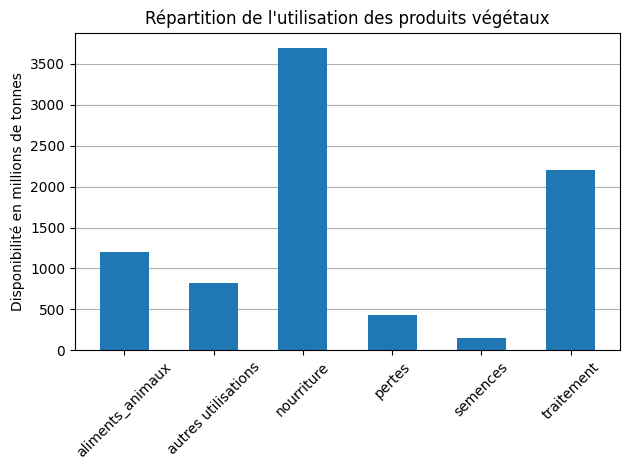

In [206]:
# Tracage d'un graphique à barre pour la répartition de l'utilisation des produits végétaux par catégorie
# Calcul de la taille des barres (en millions de tonnes)
taille_barres = (disponibilité_végétale_int.sum() / 1000)

# Noms des barres
nom_barres = disponibilité_végétale_int.columns

# Position des barres
position_barres = np.arange(len(taille_barres))

# Tracé du graphique à barres
plt.bar(position_barres, taille_barres, width=0.55, color=['tab:blue'], zorder=2)
plt.grid(axis='y')
plt.xticks(position_barres, nom_barres, rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.ylabel('Disponibilité en millions de tonnes')
plt.title('Répartition de l\'utilisation des produits végétaux')

# Affichage du graphique
plt.tight_layout()  # Ajuste automatiquement les espacements pour éviter que les étiquettes ne se chevauchent
plt.show()

In [207]:
# DATAFRAME AVEC DISPO V2GeTALE PAYS
dispo_veg_pays = dispo_alimentaire.loc[
    dispo_alimentaire['origine'] == 'vegetale',
    ['zone', 'aliments_animaux', 'autres utilisations', 'nourriture', 'pertes', 'semences', 'traitement']]
dispo_veg_pays

,zone,aliments_animaux,autres utilisations,nourriture,pertes,semences,traitement
1,Afghanistan,0.0,0.0,39.0,2.0,0.0,0.0
2,Afghanistan,0.0,0.0,2.0,0.0,0.0,0.0
3,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,0.0,0.0,82.0,0.0,0.0,0.0
6,Afghanistan,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
15595,Îles Salomon,0.0,0.0,0.0,0.0,0.0,0.0
15596,Îles Salomon,0.0,0.0,0.0,0.0,0.0,0.0
15597,Îles Salomon,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
#TOTAL Disponibilite interieure
total_filter_dispo_intérieure = dispo_alimentaire["disponibilite_interieure"].sum()
total_filter_dispo_intérieure

np.float64(9848994.0)

In [209]:
# Création du df pour calcul de la proportion disponibilité interieure
proportion_dispo_interieure = dispo_alimentaire.drop(columns = [
    "exportations",
    "importations",
    "production",
    "semences",
    "traitement",
    "variation_stock",
    "disponibilite_kcal_p_j",
    "disponibilite_kg_p_an",
    "disponibilite_mg_g_p_j",
    "disponibilite_proteines_g_p_j",
    "origine"])
proportion_dispo_interieure

,zone,produit,aliments_animaux,autres utilisations,disponibilite_interieure,nourriture,pertes
0,Afghanistan,Abats Comestible,0.0,0.0,53.0,53.0,0.0
1,Afghanistan,"Agrumes, Autres",0.0,0.0,41.0,39.0,2.0
2,Afghanistan,Aliments pour enfants,0.0,0.0,2.0,2.0,0.0
3,Afghanistan,Ananas,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,0.0,0.0,82.0,82.0,0.0
...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,0.0,0.0,3.0,3.0,0.0
15601,Îles Salomon,Viande de Volailles,0.0,0.0,2.0,2.0,0.0
15602,Îles Salomon,"Viande, Autre",0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,0.0,0.0,0.0,0.0,0.0


In [210]:
#calcul des proportions des différentes utilisations de la disponibilité intérieure pour 'Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations'
proportion_dispo_interieure_aliments_animaux = round((proportion_dispo_interieure['aliments_animaux'] / proportion_dispo_interieure	['disponibilite_interieure']) * 100, 1)
proportion_dispo_interieure_autres_utilisations = round((proportion_dispo_interieure	['autres utilisations'] / proportion_dispo_interieure	['disponibilite_interieure']) * 100, 1)
proportion_dispo_interieure_pertes = round((proportion_dispo_interieure	['pertes'] / proportion_dispo_interieure	['disponibilite_interieure']) * 100, 1)
proportion_dispo_interieure_nourriture = round((proportion_dispo_interieure	['nourriture'] / proportion_dispo_interieure	['disponibilite_interieure']) * 100, 1)
proportion_dispo_interieure[' % utilisation animale'], proportion_dispo_interieure	[' % autres utilisations'], proportion_dispo_interieure	 ['% pertes'], proportion_dispo_interieure	['% nourriture'] = [proportion_dispo_interieure_aliments_animaux, proportion_dispo_interieure_autres_utilisations, proportion_dispo_interieure_pertes, proportion_dispo_interieure_nourriture]
proportion_dispo_interieure

,zone,produit,aliments_animaux,autres utilisations,disponibilite_interieure,nourriture,pertes,% utilisation animale,% autres utilisations,% pertes,% nourriture
0,Afghanistan,Abats Comestible,0.0,0.0,53.0,53.0,0.0,0.0,0.0,0.0,100.0
1,Afghanistan,"Agrumes, Autres",0.0,0.0,41.0,39.0,2.0,0.0,0.0,4.9,95.1
2,Afghanistan,Aliments pour enfants,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,100.0
3,Afghanistan,Ananas,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,0.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,100.0
15601,Îles Salomon,Viande de Volailles,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,100.0
15602,Îles Salomon,"Viande, Autre",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [211]:
# % d'utilisation de la disponibilité intérieure pour nourrir les animaux
pct_dispo_alimenta_animaux = dispo_alimentaire.drop(columns = [
    "exportations",
    "importations",
    "production",
    "semences",
    "traitement",
    "variation_stock",
    "disponibilite_kcal_p_j",
    "disponibilite_kg_p_an",
    "disponibilite_mg_g_p_j",
    "disponibilite_proteines_g_p_j",
    "origine",
    "autres utilisations",
    "pertes",
    "nourriture"])
pct_dispo_alimenta_animaux['% utilisation animale'] = proportion_dispo_interieure_aliments_animaux
pct_dispo_alimenta_animaux.dropna()
pct_dispo_alimenta_animaux

,zone,produit,aliments_animaux,disponibilite_interieure,% utilisation animale
0,Afghanistan,Abats Comestible,0.0,53.0,0.0
1,Afghanistan,"Agrumes, Autres",0.0,41.0,0.0
2,Afghanistan,Aliments pour enfants,0.0,2.0,0.0
3,Afghanistan,Ananas,0.0,0.0,NaN
4,Afghanistan,Bananes,0.0,82.0,0.0
...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,0.0,3.0,0.0
15601,Îles Salomon,Viande de Volailles,0.0,2.0,0.0
15602,Îles Salomon,"Viande, Autre",0.0,0.0,NaN
15603,Îles Salomon,Vin,0.0,0.0,NaN


In [212]:
# SOMME d'utilisation de la disponibilité intérieure pour nourrir les animaux par pays
somme_dispo_alimenta_animaux = pct_dispo_alimenta_animaux.groupby('zone').sum()
somme_dispo_alimenta_animaux

,produit,aliments_animaux,disponibilite_interieure,% utilisation animale
zone,,,,
Afghanistan,"Abats ComestibleAgrumes, AutresAliments pour e...",768.0,13515.0,233.2
Afrique du Sud,"Abats ComestibleAgrumes, AutresAlcool, non Com...",5309.0,61256.0,424.3
Albanie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",660.0,4758.0,303.5
Algérie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",4352.0,42630.0,406.5
Allemagne,"Abats ComestibleAgrumes, AutresAlcool, non Com...",30209.0,162275.0,1149.5
...,...,...,...,...
Émirats arabes unis,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1174.0,11850.0,533.6
Équateur,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1200.0,18614.0,502.1
États-Unis d'Amérique,"Abats ComestibleAgrumes, AutresAlcool, non Com...",148432.0,777992.0,748.5


In [213]:
#SOMME d'utilisation de la disponibilité intérieure pour nourrir les animaux MONDIALE
dispo_mondial_intérieure_alim_animaux = somme_dispo_alimenta_animaux["% utilisation animale"].sum()
dispo_mondial_intérieure_alim_animaux

np.float64(73376.9)

In [214]:
#Rapport d'utilisation de la disponibilité intérieure pour nourrir les animaux MONDIALE


In [215]:
#  % autres utilisations par rapport à la disponibilité intérieure

pct_dispo_autres_utilisation = dispo_alimentaire.drop(columns = [
    "exportations",
    "importations",
    "production",
    "semences",
    "traitement",
    "variation_stock",
    "disponibilite_kcal_p_j",
    "disponibilite_kg_p_an",
    "disponibilite_mg_g_p_j",
    "disponibilite_proteines_g_p_j",
    "origine",
    "aliments_animaux",
    "pertes",
    "nourriture"])
pct_dispo_autres_utilisation['% autres utilisations'] = proportion_dispo_interieure_autres_utilisations
pct_dispo_autres_utilisation.dropna()
pct_dispo_autres_utilisation

,zone,produit,autres utilisations,disponibilite_interieure,% autres utilisations
0,Afghanistan,Abats Comestible,0.0,53.0,0.0
1,Afghanistan,"Agrumes, Autres",0.0,41.0,0.0
2,Afghanistan,Aliments pour enfants,0.0,2.0,0.0
3,Afghanistan,Ananas,0.0,0.0,NaN
4,Afghanistan,Bananes,0.0,82.0,0.0
...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,0.0,3.0,0.0
15601,Îles Salomon,Viande de Volailles,0.0,2.0,0.0
15602,Îles Salomon,"Viande, Autre",0.0,0.0,NaN
15603,Îles Salomon,Vin,0.0,0.0,NaN


In [216]:
#  % de pertes par rapport à la disponibilité intérieure

pct_dispo_perte = dispo_alimentaire.drop(columns = [
    "exportations",
    "importations",
    "production",
    "semences",
    "traitement",
    "variation_stock",
    "disponibilite_kcal_p_j",
    "disponibilite_kg_p_an",
    "disponibilite_mg_g_p_j",
    "disponibilite_proteines_g_p_j",
    "origine",
    "aliments_animaux",
    "autres utilisations",
    "nourriture"])
pct_dispo_perte['% pertes'] = proportion_dispo_interieure_pertes
pct_dispo_perte.dropna()
pct_dispo_perte

,zone,produit,disponibilite_interieure,pertes,% pertes
0,Afghanistan,Abats Comestible,53.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",41.0,2.0,4.9
2,Afghanistan,Aliments pour enfants,2.0,0.0,0.0
3,Afghanistan,Ananas,0.0,0.0,NaN
4,Afghanistan,Bananes,82.0,0.0,0.0
...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,3.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,2.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",0.0,0.0,NaN
15603,Îles Salomon,Vin,0.0,0.0,NaN


In [217]:
# df spécifique au % d'utilisation de la disponibilité intérieure pour nourrir les humains
pct_nourriture_humaine = dispo_alimentaire.drop(columns = [
    "exportations",
    "importations",
    "production",
    "semences",
    "traitement",
    "variation_stock",
    "disponibilite_kcal_p_j",
    "disponibilite_kg_p_an",
    "disponibilite_mg_g_p_j",
    "disponibilite_proteines_g_p_j",
    "origine",
    "aliments_animaux",
    "autres utilisations",
    "pertes"])
pct_nourriture_humaine['% utilisation humaine'] = proportion_dispo_interieure_nourriture
pct_nourriture_humaine.dropna()

,zone,produit,disponibilite_interieure,nourriture,% utilisation humaine
0,Afghanistan,Abats Comestible,53.0,53.0,100.0
1,Afghanistan,"Agrumes, Autres",41.0,39.0,95.1
2,Afghanistan,Aliments pour enfants,2.0,2.0,100.0
4,Afghanistan,Bananes,82.0,82.0,100.0
5,Afghanistan,"Beurre, Ghee",36.0,36.0,100.0
...,...,...,...,...,...
15591,Îles Salomon,Riz (Eq Blanchi),49.0,36.0,73.5
15594,Îles Salomon,Sucre Eq Brut,2.0,2.0,100.0
15599,Îles Salomon,Viande de Bovins,3.0,3.0,100.0
15600,Îles Salomon,Viande de Suides,3.0,3.0,100.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

Dans cette partie, on va comparer la répartiotion de l'utilisation des céréales pour l'alimentation humaine et animale.

In [218]:
# Copie dédiée aux céréales d'un df existant

donnees_cereales = dispo_alimentaire.copy()

In [219]:
#Création d'une liste avec toutes les variables
# Création liste céréales (source: FAOSTAT)
liste_cereales = ['Riz (Eq Blanchi)', 'Avoine', 'Maïs', 'Soja', 'Seigle', 'Sorgho', 'Céréales, Autres', 'Blé', 'Millet', 'Orge']

# Création DataFrame 'utilisation_cereales' depuis 'liste_cereales' : sélection uniquement les lignes où la valeur de la colonne 'produit' est présente dans la liste.
cereales_utilisation = dispo_alimentaire.loc[dispo_alimentaire['produit'].isin(liste_cereales), ['nourriture', 'aliments_animaux']]

# Affichage somme céréales pour 'nourriture' et 'aliments_animaux'
cereales_utilisation.sum()

,0
nourriture,1039658.0
aliments_animaux,891011.0


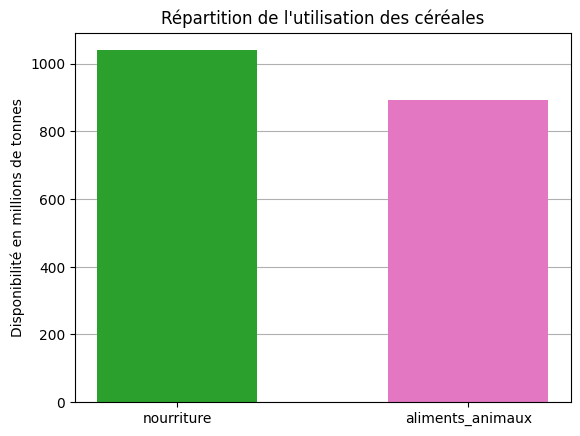

In [220]:
# Traçage graphique
taille_barres = (cereales_utilisation.sum() / 1000)
nom_barres = cereales_utilisation.columns
position_barres = np.arange(len(taille_barres))

plt.bar(position_barres, taille_barres, width = 0.55, color = ['tab:green', 'tab:pink'], zorder = 2)
plt.grid(axis = 'y')
plt.xticks(position_barres, nom_barres)
plt.ylabel('Disponibilité en millions de tonnes')
plt.title('Répartition de l\'utilisation des céréales')
plt.show()

La quantité de céréales utilisés pour les animaux est inférieure à celle utilisée pour l'alimentation humaine mais, en comparaison avec cette dernière, sa valeur reste très importante => Voir Graph

In [221]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
# Choix des produits céréaliers (selon le FAO)

#donnees_cereales = donnees_cereales.loc[(donnees_cereales["produit"] == "Millet") | (donnees_cereales["produit"] == "Orge") | (donnees_cereales["produit"] == "Seigle")| (donnees_cereales["produit"] == "Céréales, Autres")| (donnees_cereales["produit"] == "Blé")| (donnees_cereales["produit"] == "Soja")| (donnees_cereales["produit"] == "Maïs")| (donnees_cereales["produit"] == "Avoine") | (donnees_cereales["produit"] == "Riz (Eq Blanchi)")]
#donnees_cereales

In [222]:
# somme par pays
donnees_cereales = pd.pivot_table(data=donnees_cereales,index=['zone'],aggfunc="sum")
donnees_cereales

,aliments_animaux,autres utilisations,disponibilite_interieure,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,exportations,importations,nourriture,origine,pertes,production,produit,semences,traitement,variation_stock
zone,,,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,13515.0,2087.0,351.41,33.50,58.26,278.0,2988.0,10735.0,animalevegetalevegetalevegetalevegetaleanimale...,1135.0,11171.0,"Abats ComestibleAgrumes, AutresAliments pour e...",395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,61256.0,3020.0,564.80,83.58,85.33,11674.0,7517.0,29812.0,animalevegetalevegetalevegetalevegetaleanimale...,2193.0,63263.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",253.0,22819.0,2153.0
Albanie,660.0,174.0,4758.0,3188.0,1095.54,106.48,111.37,94.0,933.0,3476.0,animalevegetalevegetalevegetalevegetaleanimale...,276.0,3964.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",55.0,113.0,-45.0
Algérie,4352.0,1707.0,42630.0,3293.0,809.13,76.48,91.92,655.0,17403.0,31729.0,animalevegetalevegetalevegetalevegetaleanimale...,3753.0,26359.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",449.0,637.0,-479.0
Allemagne,30209.0,7711.0,162275.0,3503.0,957.52,141.62,101.39,57431.0,65353.0,79238.0,animalevegetalevegetalevegetalevegetaleanimale...,3781.0,154547.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,11850.0,3275.0,700.24,87.16,104.51,4343.0,15327.0,6548.0,animalevegetalevegetalevegetalevegetaleanimale...,705.0,1192.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3.0,804.0,-327.0
Équateur,1200.0,1909.0,18614.0,2346.0,544.91,94.64,61.30,8002.0,1725.0,8574.0,animalevegetalevegetalevegetalevegetaleanimale...,707.0,24337.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,777992.0,3682.0,1002.39,161.37,109.42,163524.0,81887.0,320889.0,animalevegetalevegetalevegetalevegetaleanimale...,7162.0,894668.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",10403.0,141010.0,-35032.0


In [223]:
# Total Production Mondiale
cereales_production_mondiale = donnees_cereales['production'].sum()
cereales_production_mondiale

np.float64(10009680.0)

In [224]:
# Utilisation pour la nourriture humaine
nourriture_humaine = donnees_cereales['nourriture'].sum()
nourriture_humaine

np.float64(4876258.0)

In [225]:
#Proportion de céréales pour la nourriture humaine
proportion_nourriture_humaine = round((nourriture_humaine/cereales_production_mondiale) * 100,1)
print("Proportion utilisée pour la nourriture humaine :",proportion_nourriture_humaine,"%")

Proportion utilisée pour la nourriture humaine : 48.7 %


In [226]:
# Utilisation pour la nourriture animale
utilisation_animale = donnees_cereales['aliments_animaux'].sum()
utilisation_animale

np.float64(1304245.0)

In [227]:
#Proportion de céréales pour la nourriture animales
proportion_cereales_alim_animaux = round((utilisation_animale/cereales_production_mondiale) * 100,1)
print("Proportion dédiée à nourrir les animaux :", proportion_cereales_alim_animaux,"%")

Proportion dédiée à nourrir les animaux : 13.0 %


In [228]:
# Exportation des céréales
exportation_cereales = donnees_cereales['exportations'].sum()
exportation_cereales

np.float64(1352158.0)

In [229]:
#Proportion de céréales pour l'exportation
proportion_exportation_cereales = round((exportation_cereales/cereales_production_mondiale) * 100,1)
print("Proportion de céréales exportée:",proportion_exportation_cereales,"%")

Proportion de céréales exportée: 13.5 %


In [230]:
# Top 10 des plus gros exportateurs de céréales

donnees_cereales.nlargest(10, ['exportations'])

,aliments_animaux,autres utilisations,disponibilite_interieure,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,exportations,importations,nourriture,origine,pertes,production,produit,semences,traitement,variation_stock
zone,,,,,,,,,,,,,,,,,
États-Unis d'Amérique,148432.0,154699.0,777992.0,3682.0,1002.39,161.37,109.42,163524.0,81887.0,320889.0,animalevegetalevegetalevegetalevegetaleanimale...,7162.0,894668.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",10403.0,141010.0,-35032.0
Brésil,63740.0,367300.0,1033314.0,3262.0,779.79,117.72,95.01,126552.0,16817.0,156246.0,animalevegetalevegetalevegetalevegetaleanimale...,75914.0,1143605.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2884.0,367282.0,-556.0
France,22769.0,14405.0,146905.0,3482.0,937.43,159.15,110.50,65945.0,33769.0,60272.0,animalevegetalevegetalevegetalevegetaleanimale...,3261.0,178136.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1648.0,44966.0,944.0
Allemagne,30209.0,7711.0,162275.0,3503.0,957.52,141.62,101.39,57431.0,65353.0,79238.0,animalevegetalevegetalevegetalevegetaleanimale...,3781.0,154547.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1551.0,39842.0,-192.0
Canada,26137.0,4450.0,79562.0,3499.0,964.63,147.04,105.06,54771.0,19422.0,33945.0,animalevegetalevegetalevegetalevegetaleanimale...,2118.0,127553.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2227.0,11336.0,-12641.0
Argentine,7890.0,4194.0,114369.0,3226.0,784.96,116.46,102.60,52333.0,1212.0,32531.0,animalevegetalevegetalevegetalevegetaleanimale...,3522.0,176124.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2416.0,63983.0,-10632.0
Pays-Bas,8991.0,4299.0,42461.0,3222.0,1069.22,125.30,111.46,52179.0,52910.0,17924.0,animalevegetalevegetalevegetalevegetaleanimale...,597.0,41636.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",403.0,10510.0,91.0
Thaïlande,9561.0,4210.0,158130.0,2785.0,586.23,58.57,60.85,50430.0,11335.0,39283.0,animalevegetalevegetalevegetalevegetaleanimale...,5749.0,201764.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",823.0,99170.0,-4534.0
Australie,9236.0,3032.0,66992.0,3278.0,941.76,150.81,106.26,43184.0,5879.0,21988.0,animalevegetalevegetalevegetalevegetaleanimale...,520.0,100956.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1098.0,31148.0,3339.0


In [231]:
# Top 10 des plus gros producteurs de céréales

donnees_cereales.nlargest(10, ['production'])

,aliments_animaux,autres utilisations,disponibilite_interieure,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,exportations,importations,nourriture,origine,pertes,production,produit,semences,traitement,variation_stock
zone,,,,,,,,,,,,,,,,,
"Chine, continentale",345951.0,78688.0,2036726.0,3112.0,901.90,95.09,98.05,36060.0,156246.0,1249625.0,animalevegetalevegetalevegetalevegetaleanimale...,89575.0,1930913.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",16860.0,256068.0,-14371.0
Brésil,63740.0,367300.0,1033314.0,3262.0,779.79,117.72,95.01,126552.0,16817.0,156246.0,animalevegetalevegetalevegetalevegetaleanimale...,75914.0,1143605.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2884.0,367282.0,-556.0
Inde,49129.0,15162.0,1100838.0,2454.0,494.93,52.49,59.91,40807.0,18954.0,619168.0,animalevegetalevegetalevegetalevegetaleanimale...,55930.0,1126270.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",29432.0,332123.0,-3573.0
États-Unis d'Amérique,148432.0,154699.0,777992.0,3682.0,1002.39,161.37,109.42,163524.0,81887.0,320889.0,animalevegetalevegetalevegetalevegetaleanimale...,7162.0,894668.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",10403.0,141010.0,-35032.0
Fédération de Russie,58511.0,2812.0,263784.0,3360.0,888.71,105.60,102.81,26777.0,30449.0,126945.0,animalevegetalevegetalevegetalevegetaleanimale...,4997.0,263296.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",18889.0,51655.0,-3177.0
Indonésie,9531.0,34229.0,226930.0,2776.0,475.92,57.70,62.20,31912.0,23466.0,118914.0,animalevegetalevegetalevegetalevegetaleanimale...,13081.0,238559.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1112.0,50365.0,-3182.0
Thaïlande,9561.0,4210.0,158130.0,2785.0,586.23,58.57,60.85,50430.0,11335.0,39283.0,animalevegetalevegetalevegetalevegetaleanimale...,5749.0,201764.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",823.0,99170.0,-4534.0
Nigéria,36023.0,16718.0,192388.0,2700.0,659.13,56.43,63.77,748.0,14510.0,114439.0,animalevegetalevegetalevegetalevegetalevegetal...,19854.0,179631.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",994.0,4362.0,-999.0
France,22769.0,14405.0,146905.0,3482.0,937.43,159.15,110.50,65945.0,33769.0,60272.0,animalevegetalevegetalevegetalevegetaleanimale...,3261.0,178136.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1648.0,44966.0,944.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [232]:
#Création de la colonne proportion par pays
# Calcul 'taux_sous_nutrition' et tri par pays
population_sous_nutrition_2017['taux_sous_nutrition'] = (
    population_sous_nutrition_2017['population_sous_nutri'] / population_sous_nutrition_2017['population']
)


In [233]:
#affichage après trie des 10 pires pays
taux_sous_nutrition_pays = population_sous_nutrition_2017.nlargest(10, 'taux_sous_nutrition').style.format({'taux_sous_nutrition':'{:.1%}'})
taux_sous_nutrition_pays

,zone,population,population_sous_nutri,proportion_pct (%),taux_sous_nutrition
76,Haïti,11.000000,5.300000,48.200000,48.2%
155,République populaire démocratique de Corée,25.400000,12.000000,47.200000,47.2%
106,Madagascar,25.600000,10.500000,41.000000,41.0%
101,Libéria,4.700000,1.800000,38.300000,38.3%
98,Lesotho,2.100000,0.800000,38.100000,38.1%
180,Tchad,15.000000,5.700000,38.000000,38.0%
158,Rwanda,12.000000,4.200000,35.000000,35.0%
182,Timor-Leste,1.200000,0.400000,33.300000,33.3%
119,Mozambique,28.600000,9.400000,32.900000,32.9%
0,Afghanistan,36.300000,10.500000,28.900000,28.9%


In [234]:
taux_sous_nutrition_pays_pct = population_sous_nutrition_2017[['zone', 'proportion_pct (%)']]
taux_sous_nutrition_pays_pct

,zone,proportion_pct (%)
0,Afghanistan,28.9
1,Afrique du Sud,5.4
2,Albanie,3.4
3,Algérie,3.1
4,Allemagne,0.0
...,...,...
194,Venezuela (République bolivarienne du),27.2
195,Viet Nam,6.9
196,Yémen,0.0
197,Zambie,0.0


In [235]:
taux_sous_nutrition_pays_pct = taux_sous_nutrition_pays_pct.sort_values(by='proportion_pct (%)', ascending=False)
taux_sous_nutrition_pays_pct

,zone,proportion_pct (%)
76,Haïti,48.2
155,République populaire démocratique de Corée,47.2
106,Madagascar,41.0
101,Libéria,38.3
98,Lesotho,38.1
...,...,...
122,Nauru,NaN
127,Nioué,NaN
135,Palaos,NaN
184,Tokélaou,NaN


In [240]:
# Liste descendante des taux de sous nutrition par pays
# Utilisation de nlargest avec keep='first' pour obtenir les 5 premières occurrences des plus grandes valeurs
# Specify the 'columns' argument to indicate the column to sort by
top_5 = taux_sous_nutrition_pays_pct.nlargest(5, 'proportion_pct (%)', keep='first')
top_5

,zone,proportion_pct (%)
76,Haïti,48.2
155,République populaire démocratique de Corée,47.2
106,Madagascar,41.0
101,Libéria,38.3
98,Lesotho,38.1


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [241]:
aide_alimentaire.count()

,0
zone,1475
annee,1475
produit,1475
valeur,1475


In [242]:
aide_alimentaire

,zone,annee,produit,valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [243]:
# Calcul aides et tri descendant par pays des pays ayant le plus d'aide
top_10_pays_plus_aide = aide_alimentaire.groupby('zone')['valeur'].sum().nlargest(10)
top_10_pays_plus_aide

,valeur
zone,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


In [244]:
# Vérifier le type du top_10_pays_plus_aide
if len(top_10_pays_plus_aide.shape) == 1:
    print("série.")
elif len(top_10_pays_plus_aide.shape) == 2:
    print(" DataFrame.")
else:
    print("Autre chose.")

série.


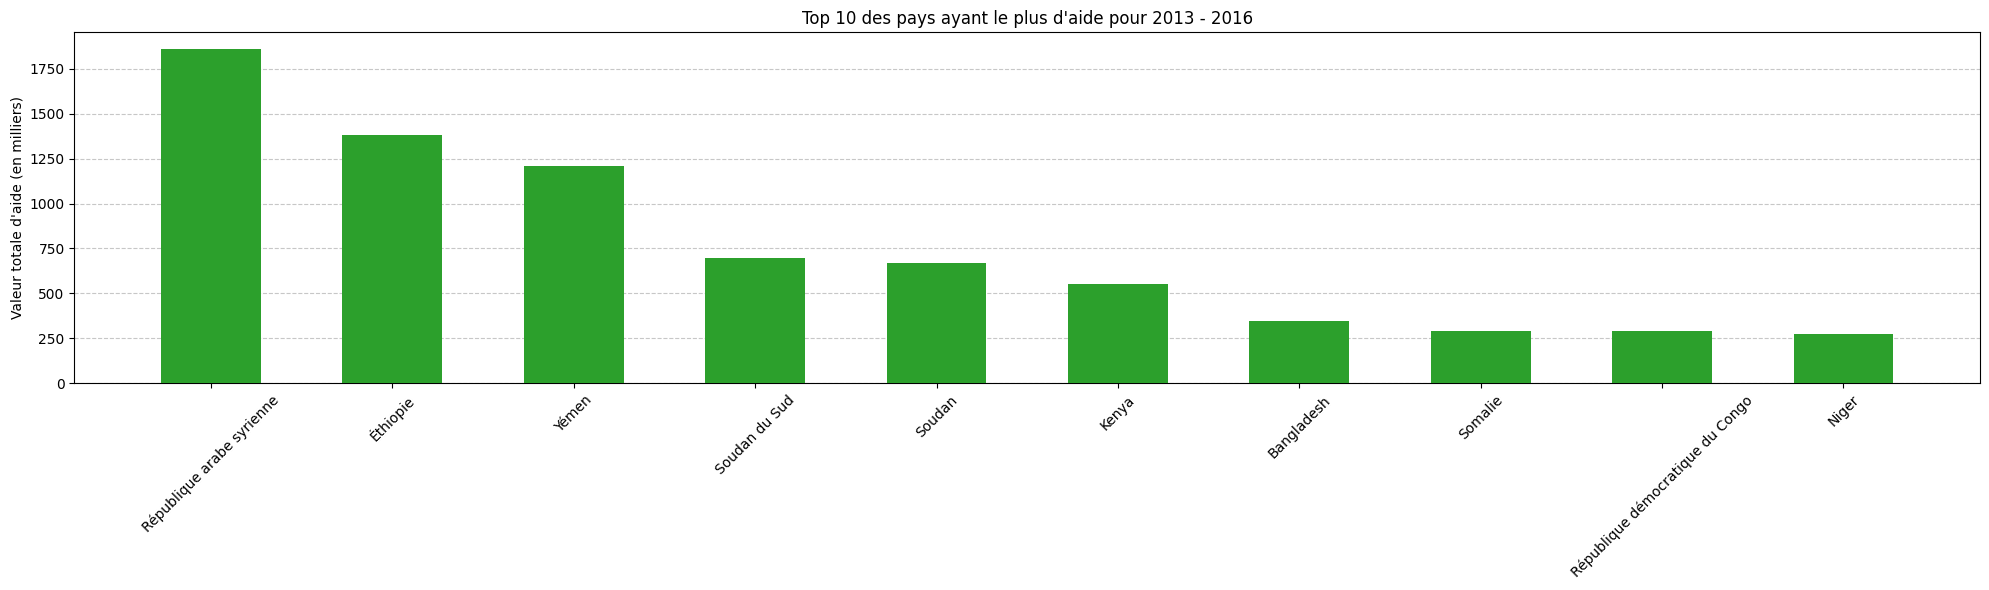

In [245]:
# Présentation en graphique à barre
# Calculer la somme des valeurs de top_10_pays (divisées par 1000

# Divisez cette colonne par 1000
taille_barres = top_10_pays_plus_aide / 1000

# Extraire le nom des pays à partir de l'index du top_10_pays
nom_barres = top_10_pays_plus_aide.index

# Créer une séquence de positions pour les barres
position_barres = np.arange(len(taille_barres))

# Créer le graphique à barres
plt.figure(figsize=(20, 6))  # Ajustez la taille de la figure si nécessaire
plt.bar(position_barres, taille_barres, width=0.55, color='tab:green', zorder=10)

# Ajouter une grille pour faciliter la lecture
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Personnaliser les étiquettes de l'axe x avec les noms des pays
plt.xticks(position_barres, nom_barres, rotation=45)

# Ajouter un libellé à l'axe y
plt.ylabel("Valeur totale d'aide (en milliers)")

# Ajouter un titre au graphique
plt.title("Top 10 des pays ayant le plus d'aide pour 2013 - 2016")

# Afficher le graphique
plt.tight_layout()  # Ajuste automatiquement la mise en page pour éviter que le titre ne soit tronqué
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [246]:
aide_alimentaire.dtypes

,0
zone,object
annee,object
produit,object
valeur,int64


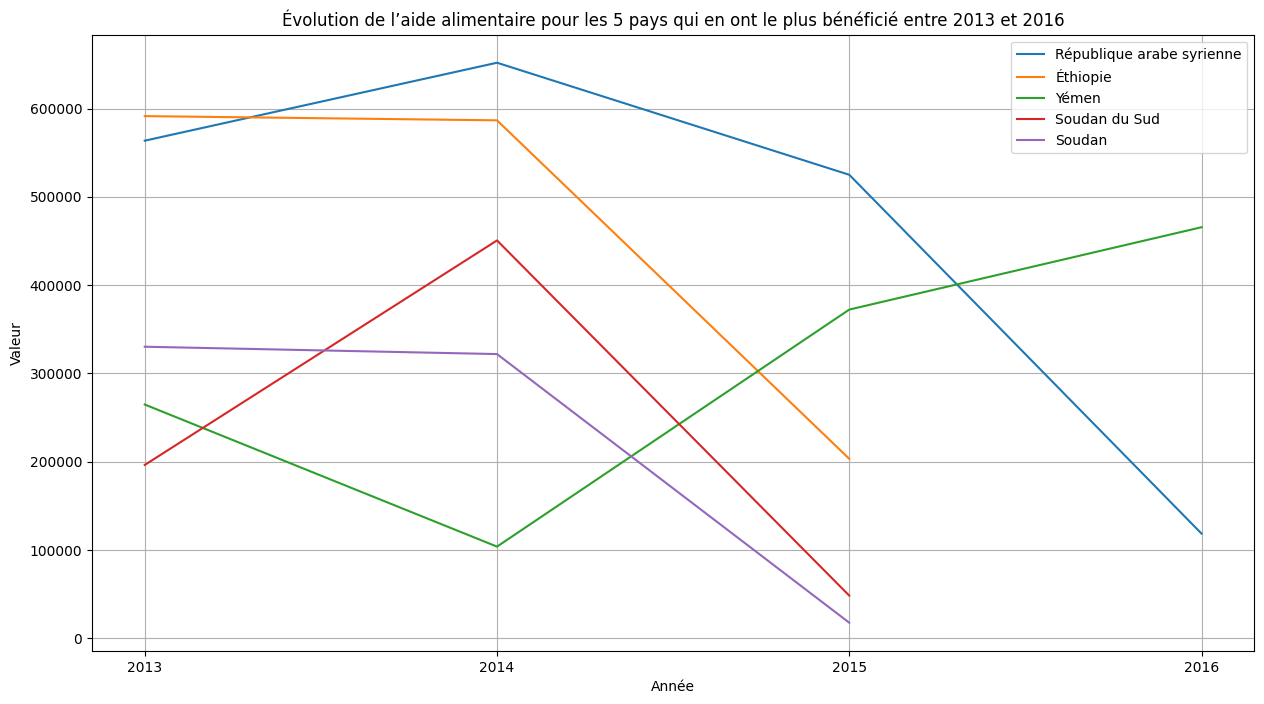

In [247]:
# Sélection des 5 pays ayant reçu le plus d'aide
top_5_pays = aide_alimentaire.groupby('zone')['valeur'].sum().nlargest(5).index

# Regrouper les données par année pour les 5 pays et calculez la somme des valeurs pour chaque année
aide_annee = aide_alimentaire[aide_alimentaire['zone'].isin(top_5_pays)].groupby(['annee', 'zone'])['valeur'].sum().unstack()

# Tracez une courbe d'évolution pour chaque pays
plt.figure(figsize=(15, 8))

for zone in top_5_pays:
    plt.plot(aide_annee.index, aide_annee[zone], label=zone)

# Ajoutez un titre au graphique
plt.title("Évolution de l’aide alimentaire pour les 5 pays qui en ont le plus bénéficié entre 2013 et 2016")

# Ajoutez des étiquettes d'axe
plt.xlabel('Année')
plt.ylabel('Valeur')

# Spécifiez le format des étiquettes de l'axe des x (sans chiffre après la virgule)
plt.xticks(aide_annee.index.astype(int))

# Ajoutez une légende pour les pays
plt.legend()

# Grille pour la lecture
plt.grid(True)

# Affichez le graphique
plt.show()

In [248]:
# Calcul aides et tri descendant par produit
aide_alimentaire.groupby('produit')['valeur'].sum().nlargest(10)

,valeur
produit,
Céréales,4256884
Blé et Farin,1781515
Non-céréales,1261513
Céréales Secondaires,1166565
"Riz, total",742418
"Légumineuses Sèches,Tot.",737398
Mélanges et préparations,425839
Huiles végétales,344973
BulgurFarEnt,140547


In [249]:
# Calcul proportion céréales dans aides
liste_cereales_aides = ['Céréales', 'Blé et Farin', 'Céréales Secondaires', 'Riz, total']
somme_cereales_aides = aide_alimentaire.loc[aide_alimentaire['produit'].isin(liste_cereales_aides), 'valeur'].sum()
part_cereales_aides = somme_cereales_aides / aide_alimentaire['valeur'].sum()
print('{:.1%}'.format(part_cereales_aides))

72.0%


 A partir des résultats du top 10 des produits d'aide alimentaire, on voit que 72% représente des céréales.

In [251]:
# Tableau de l'aide fournie pour chaque produit par année

aide_produit = pd.pivot_table(aide_alimentaire,index = ['produit'], columns = ['annee'], values=['valeur'], aggfunc = sum)
#Convertir toutes les colonnes en numérique, en remplaçant les erreurs par des NaN
aide_produit = aide_produit.apply(pd.to_numeric, errors='coerce')
aide_produit["total_aide (tonnes)"] = aide_produit.sum(axis=1)

print("Les céréales sont de très loin l'aide alimentaire la plus distribuée chaque année :")
aide_produit.sort_values(by = 'total_aide (tonnes)', ascending = False)

Les céréales sont de très loin l'aide alimentaire la plus distribuée chaque année :


<ipython-input-251-c118f3e99680>:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aide_produit = pd.pivot_table(aide_alimentaire,index = ['produit'], columns = ['annee'], values=['valeur'], aggfunc = sum)


valeur                                 \
annee                          2013       2014      2015      2016   
produit                                                              
Céréales                  1589646.0  1571543.0  810346.0  285349.0   
Blé et Farin               656791.0   559060.0  374904.0  190760.0   
Non-céréales               493304.0   398314.0  283460.0   86435.0   
Céréales Secondaires       448191.0   598961.0  118235.0    1178.0   
Riz, total                 307075.0   217823.0  162746.0   54774.0   
Légumineuses Sèches,Tot.   286741.0   253681.0  146697.0   50279.0   
Mélanges et préparations   144948.0   127981.0  126398.0   26512.0   
Huiles végétales           151443.0   107539.0   71766.0   14225.0   
BulgurFarEnt                32641.0    67718.0   28063.0   12125.0   
Sucre, total                31639.0    13189.0   44718.0   11468.0   
Autres non-céréales         13359.0    15211.0   12729.0    7572.0   
Lait, total                  3763.0     5690.0    2250.0     775.0   
Fruits secs, total           3410.0      540.0    3392.0    2044.0   
Poiss&produi                 2672.0     1850.0    1803.0      72.0   
Viande Total                    1.0       52.0       NaN       NaN   
Graisses Com                   50.0        NaN       NaN       NaN   

                         total_aide (tonnes)  
annee                                         
produit                                       
Céréales                           4256884.0  
Blé et Farin                       1781515.0  
Non-céréales                       1261513.0  
Céréales Secondaires               1166565.0  
Riz, total                          742418.0  
Légumineuses Sèches,Tot.            737398.0  
Mélanges et préparations            425839.0  
Huiles végétales                    344973.0  
BulgurFarEnt                        140547.0  
Sucre, total                        101014.0  
Autres non-céréales                  48871.0  
Lait, total                          12478.0  
Fruits secs, total                    9386.0  
Poiss&produi                          6397.0  
Viande Total                            53.0  
Graisses Com                            50.0

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [252]:
dispo_alimentaire_2017

,zone,annee,population,produit,disponibilite_kcal_p_j,dispo_kcal_pays
0,Afghanistan,2017,36296113.0,"Abats ComestibleAgrumes, AutresAliments pour e...",2087.0,7.574999e+10
1,Afrique du Sud,2017,57009756.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3020.0,1.721695e+11
2,Albanie,2017,2884169.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3188.0,9.194731e+09
3,Algérie,2017,41389189.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3293.0,1.362946e+11
4,Allemagne,2017,82658409.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",3503.0,2.895524e+11
...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2633.0,7.741674e+10
168,Viet Nam,2017,94600648.0,"Abats ComestibleAgrumes, AutresAliments pour e...",2744.0,2.595842e+11
169,Yémen,2017,27834819.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",2217.0,6.170979e+10
170,Zambie,2017,16853599.0,"Abats ComestibleAgrumes, AutresAlcool, non Com...",1924.0,3.242632e+10


In [253]:
#Affichage du top 10 des pays qui ont le moins de dispo alimentaire en kcal par personne et par jour

top_10_pays_moins_dispo_alimentaire = dispo_alimentaire_2017.nsmallest(10, 'disponibilite_kcal_p_j')
top_10_pays_moins_dispo_alimentaire[['zone' , 'disponibilite_kcal_p_j']]

,zone,disponibilite_kcal_p_j
129,République centrafricaine,1879.0
170,Zambie,1924.0
95,Madagascar,2056.0
0,Afghanistan,2087.0
68,Haïti,2089.0
134,République populaire démocratique de Corée,2093.0
155,Tchad,2109.0
171,Zimbabwe,2113.0
118,Ouganda,2126.0
53,Éthiopie,2129.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [254]:
#Affichage du top 10 des pays qui ont le plus de disponibilité alimentaire en kcal par personne et par jour
top_10_pays_plus_dispo_alimentaire = dispo_alimentaire_2017.nlargest(10, ['disponibilite_kcal_p_j'])
top_10_pays_plus_dispo_alimentaire[['zone' , 'disponibilite_kcal_p_j']]

,zone,disponibilite_kcal_p_j
11,Autriche,3770.0
17,Belgique,3737.0
163,Turquie,3708.0
52,États-Unis d'Amérique,3682.0
78,Israël,3610.0
76,Irlande,3602.0
79,Italie,3578.0
93,Luxembourg,3540.0
45,Égypte,3518.0
4,Allemagne,3503.0


Les résultats des top 10 des pays ayant le plus et le moins de dispo alimentaire en Kcal par personne et par jour, on constate que certain pays ont une disponibilité largement supérieure aux apports moyens nécessaires (2000 kcal/p/j). Cependant l'apport le plus bas (1879 kcal/p/j) se rapproche du minimum préconisé.  

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [255]:
# Voir la disponibilité en kcal par jour pour la Thailande
dispo_kcal_thailande = dispo_alimentaire_2017.loc[(dispo_alimentaire_2017['zone'] == 'Thaïlande')].sum()
dispo_kcal_thailande

,0
zone,Thaïlande
annee,2017
population,69209810.0
produit,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
disponibilite_kcal_p_j,2785.0
dispo_kcal_pays,192749320850.0


In [256]:
# Population qui pourraie etre nourrie sur la base de 2000 Kcal par personne et par jour
pop_thailande_pouvant_nourrie = dispo_kcal_thailande['population'] / 2000
pop_thailande_pouvant_nourrie

np.float64(34604.905)

In [257]:
#création d'un dataframe avec uniquement la Thaïlande
dispo_manioc_thailande = dispo_alimentaire.copy()
dispo_manioc_thailande.loc[(dispo_manioc_thailande['zone'] == 'Thaïlande') & (dispo_manioc_thailande['produit'].str.contains('manioc', case = False))]

,zone,produit,origine,aliments_animaux,autres utilisations,disponibilite_kcal_p_j,disponibilite_kg_p_an,disponibilite_mg_g_p_j,disponibilite_proteines_g_p_j,disponibilite_interieure,exportations,importations,nourriture,pertes,production,semences,traitement,variation_stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0


In [258]:
# On calcule la proportion exportée en fonction de la proportion de production

exportation_manioc = round((dispo_manioc_thailande['exportations'] / dispo_manioc_thailande['production']) * 100, 1 )
exportation_manioc
print("La Thaïlande exporte 83.4% de sa production de manioc")

La Thaïlande exporte 83.4% de sa production de manioc


In [259]:

manioc_nourriture_hum = round((dispo_manioc_thailande['nourriture'] / dispo_manioc_thailande['production']) * 100, 1 )
manioc_nourriture_hum
print("Seulement 2.9% de la production de manioc est destinée à nourrir la population du pays")

Seulement 2.9% de la production de manioc est destinée à nourrir la population du pays


In [260]:
population_sous_nutrition_2017

,zone,population,population_sous_nutri,proportion_pct (%),taux_sous_nutrition
0,Afghanistan,36.3,10.5,28.9,0.289256
1,Afrique du Sud,57.0,3.1,5.4,0.054386
2,Albanie,2.9,0.1,3.4,0.034483
3,Algérie,41.4,1.3,3.1,0.031401
4,Allemagne,82.7,0.0,0.0,0.000000
...,...,...,...,...,...
194,Venezuela (République bolivarienne du),29.4,8.0,27.2,0.272109
195,Viet Nam,94.6,6.5,6.9,0.068710
196,Yémen,27.8,0.0,0.0,0.000000
197,Zambie,16.9,0.0,0.0,0.000000


In [261]:
#Calcul de la sous nutrition en Thaïlande
proportion_sous_nutri_thailande = population_sous_nutrition_2017.loc[(population_sous_nutrition_2017["zone"] == "Thaïlande")]
proportion_sous_nutri_thailande

,zone,population,population_sous_nutri,proportion_pct (%),taux_sous_nutrition
181,Thaïlande,69.2,6.2,9.0,0.089595


La Thaïlande a un taux de sous-nutrition de 9 %.
Cependant on remarque que près de la totalité de sa production de manioc 83.4% est exportée et seulement 2,9% est destinée à l'alimentation de la population.

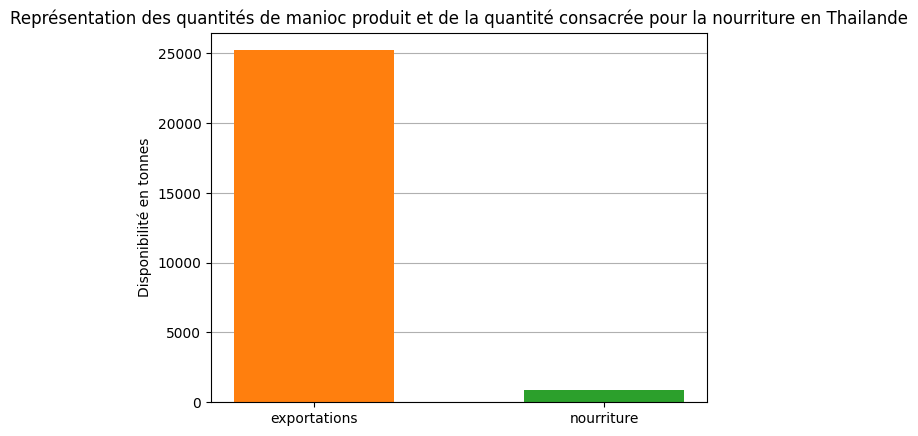

In [262]:
# Graphique à barre
expo_nourriture_thailande = dispo_manioc_thailande.loc[(dispo_manioc_thailande['zone'] == 'Thaïlande') & (dispo_manioc_thailande['produit'].str.contains('manioc', case = False))]
export_nourriture_thailande = expo_nourriture_thailande[['exportations' , 'nourriture']]
taille_barres = (export_nourriture_thailande.sum())
nom_barres = export_nourriture_thailande.columns
position_barres = np.arange(len(taille_barres))

plt.bar(position_barres, taille_barres, width = 0.55, color = ['tab:orange', 'tab:green'], zorder = 2)
plt.grid(axis = 'y')
plt.xticks(position_barres, nom_barres)
plt.ylabel('Disponibilité en tonnes')
plt.title('Représentation des quantités de manioc produit et de la quantité consacrée pour la nourriture en Thailande')
plt.show()


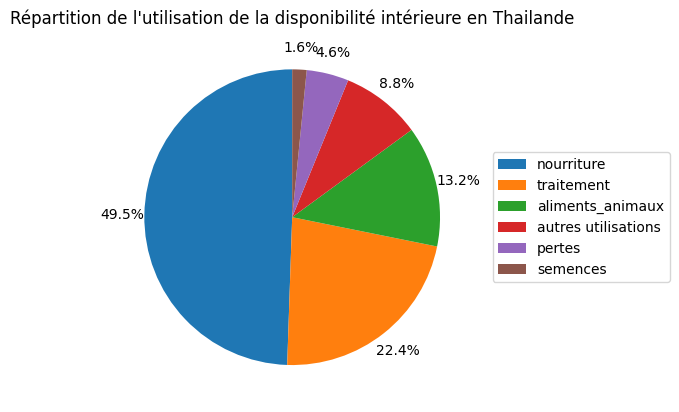

In [263]:
# Création DataFrame 'filter_expo_prod_thailande' et traçage graphique
dispo_int_manioc_thailande = dispo_manioc_thailande.loc[(dispo_manioc_thailande['zone'] == 'Thaïlande') & (dispo_manioc_thailande['produit'].str.contains('manioc', case = False))]
filter_expo_prod_thaillande = (dispo_manioc_thailande[['aliments_animaux', 'autres utilisations', 'nourriture', 'pertes', 'semences', 'traitement']]
    .sum()
    .sort_values(ascending = False)
)
plt.pie(filter_dispo_intérieure.values, autopct = '%.1f%%', pctdistance = 1.15, startangle = 90)
plt.title('Répartition de l\'utilisation de la disponibilité intérieure en Thailande')
plt.legend(filter_dispo_intérieure.index, loc = 7, bbox_to_anchor=(1.54, 0.5))
plt.show()

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

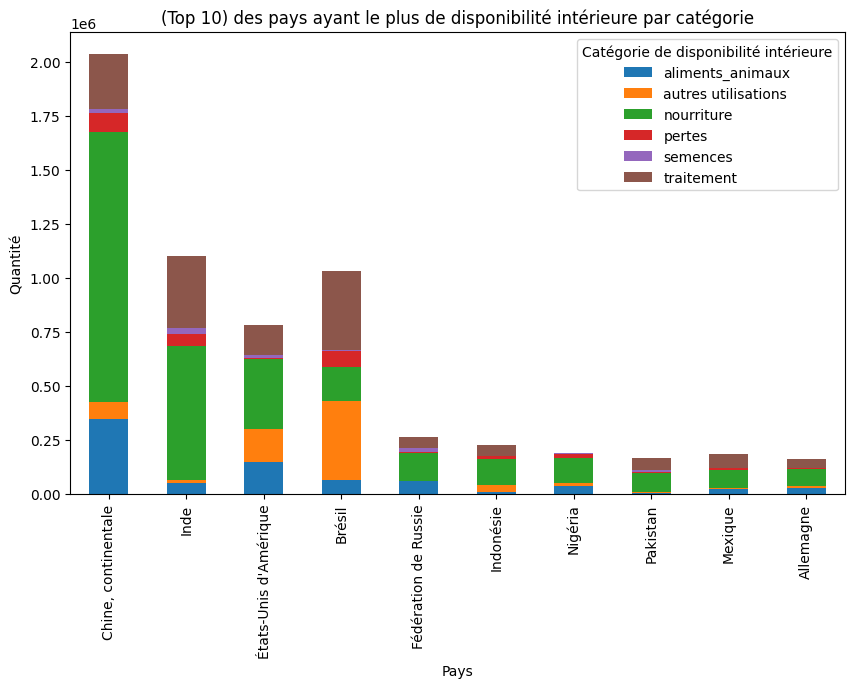

In [270]:
# Calcule de la quantité totale par pays pour chaque colonne
filter_dispo_intérieure_pays = dispo_alimentaire.groupby('zone').sum()
categorie_dispo_interieur = filter_dispo_intérieure_pays[['aliments_animaux', 'autres utilisations', 'nourriture', 'pertes', 'semences', 'traitement']]

# Triez les pays en fonction de la quantité totale de 'nourriture', puis les autres colonnes
top_10_pays = categorie_dispo_interieur.sort_values(by='nourriture', ascending=False).head(10)

# Créez un graphique à barres empilées pour les 10 premiers pays
top_10_pays.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personnalisation du graphique
plt.title('(Top 10) des pays ayant le plus de disponibilité intérieure par catégorie')
plt.xlabel('Pays')
plt.ylabel('Quantité')
plt.legend(title='Catégorie de disponibilité intérieure')

# Affichez le graphique
plt.show()

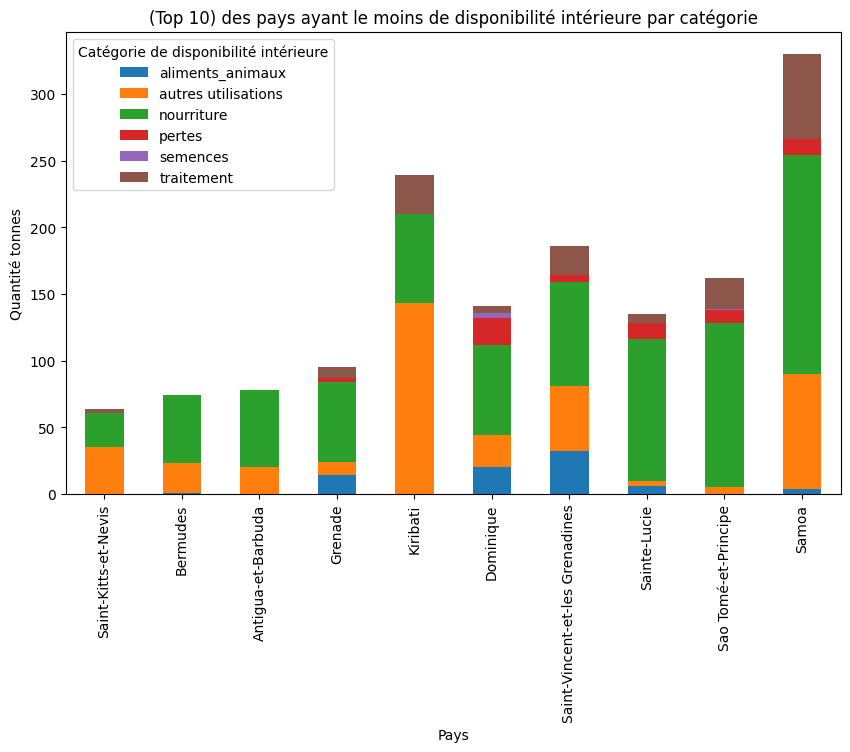

In [269]:
# Top 10 des pays ayant le moins de disponibilité intérieure
# Calcule de la quantité totale par pays pour chaque colonne
filter_dispo_intérieure_pays = dispo_alimentaire.groupby('zone').sum()
categorie_dispo_interieur = filter_dispo_intérieure_pays[['aliments_animaux', 'autres utilisations', 'nourriture', 'pertes', 'semences', 'traitement']]

# Triez les pays en fonction de la quantité totale de 'nourriture', puis les autres colonnes
top_10_pays = categorie_dispo_interieur.sort_values(by='nourriture', ascending=True).head(10)

# Créez un graphique à barres empilées pour les 10 premiers pays
top_10_pays.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personnalisation du graphique
plt.title('(Top 10) des pays ayant le moins de disponibilité intérieure par catégorie')
plt.xlabel('Pays')
plt.ylabel('Quantité tonnes')
plt.legend(title='Catégorie de disponibilité intérieure')

# Affichez le graphique
plt.show()

ANALYSE COMPLEMENTAIRE SUR AIDE ALIMENTAIRE

In [271]:
# Analyser les pays avec le taux de sous nutrition le plus élevé pour voir les aides recues
pays_plus_sous_nutri = ['Haïti', 'République populaire démocratique de Corée', 'Madagascar']

# Utilisez .loc pour filtrer les lignes contenant les noms de pays spécifiques
pays_plus_sous_nutri_filtre = aide_alimentaire.loc[aide_alimentaire['zone'].isin(pays_plus_sous_nutri)]
pays_plus_sous_nutri_filtre

,zone,annee,produit,valeur
511,Haïti,2013,Autres non-céréales,396
512,Haïti,2014,Autres non-céréales,254
513,Haïti,2015,Autres non-céréales,175
514,Haïti,2016,Autres non-céréales,105
515,Haïti,2013,BulgurFarEnt,3908
...,...,...,...,...
1151,République populaire démocratique de Corée,2015,"Riz, total",225
1152,République populaire démocratique de Corée,2013,"Sucre, total",1670
1153,République populaire démocratique de Corée,2014,"Sucre, total",1612
1154,République populaire démocratique de Corée,2015,"Sucre, total",1656


In [272]:
groupe_par_zone = pays_plus_sous_nutri_filtre.groupby('zone')['valeur'].sum()
groupe_par_zone

,valeur
zone,
Haïti,116450
Madagascar,96678
République populaire démocratique de Corée,187412


In [277]:
# Calcul aides par pays des pays ayant le moins d'aide
top_10_pays_moins_aide = aide_alimentaire.groupby('zone')['valeur'].sum().nsmallest(10)
top_10_pays_moins_aide

,valeur
zone,
Bolivie (État plurinational de),6
Géorgie,70
Timor-Leste,116
Vanuatu,802
Égypte,1122
"Chine, continentale",1298
Équateur,1362
Sao Tomé-et-Principe,1826
Tadjikistan,2028


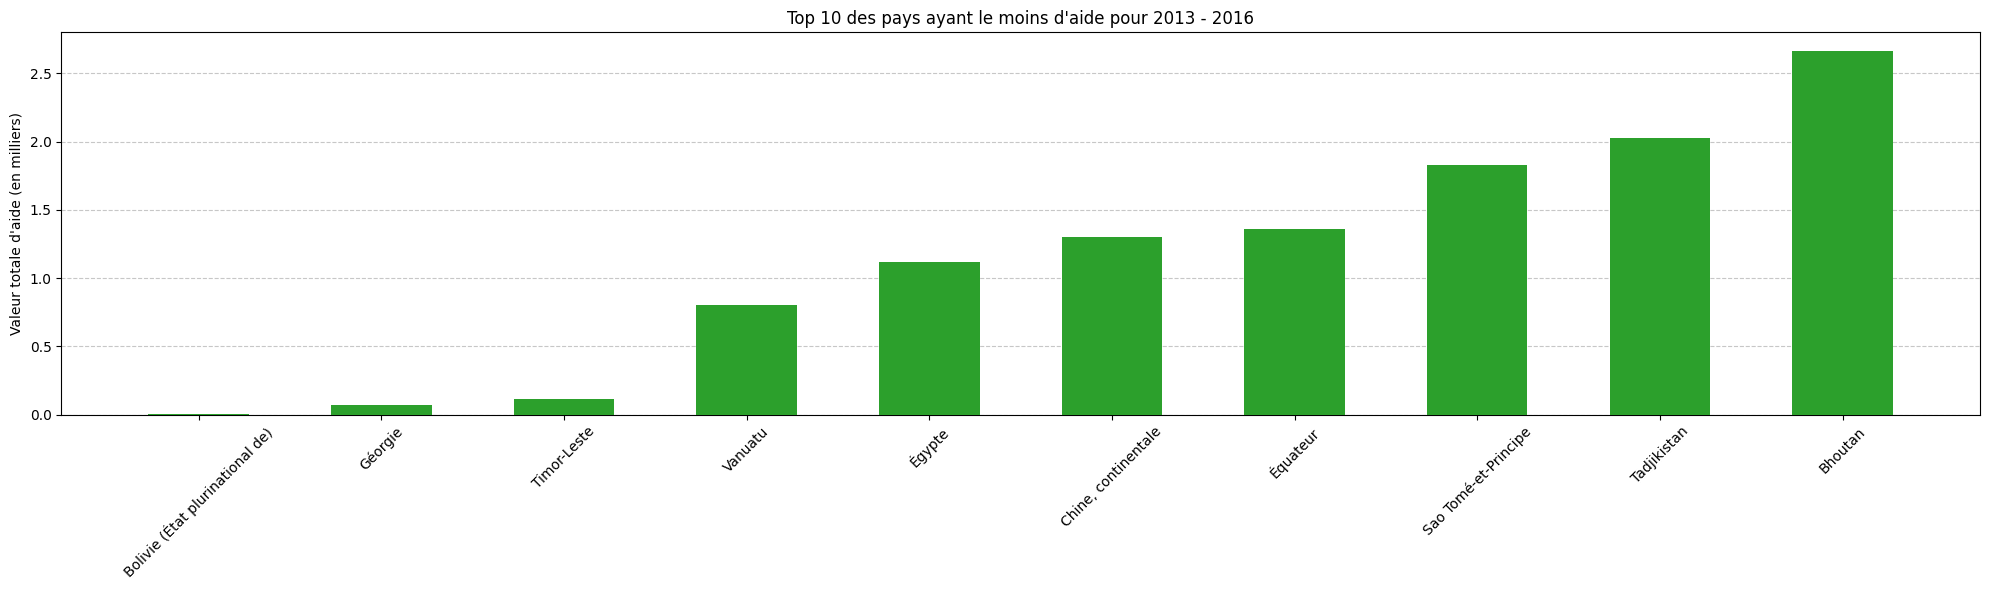

In [278]:
# Présentation en graphique à barre pays avec Moins d'aide
# Calculer la somme des valeurs de top_10_pays (divisées par 1000

# Divisez cette colonne par 1000
taille_barres = top_10_pays_moins_aide / 1000

# Extraire le nom des pays à partir de l'index du top_10_pays
nom_barres = top_10_pays_moins_aide.index

# Créer une séquence de positions pour les barres
position_barres = np.arange(len(taille_barres))

# Créer le graphique à barres
plt.figure(figsize=(20, 6))  # Ajustez la taille de la figure si nécessaire
plt.bar(position_barres, taille_barres, width=0.55, color='tab:green', zorder=30)

# Ajouter une grille pour faciliter la lecture
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Personnaliser les étiquettes de l'axe x avec les noms des pays
plt.xticks(position_barres, nom_barres, rotation=45)

# Ajouter un libellé à l'axe y
plt.ylabel("Valeur totale d'aide (en milliers)")

# Ajouter un titre au graphique
plt.title("Top 10 des pays ayant le moins d'aide pour 2013 - 2016")

# Afficher le graphique
plt.tight_layout()  # Ajuste automatiquement la mise en page pour éviter que le titre ne soit tronqué
plt.show()

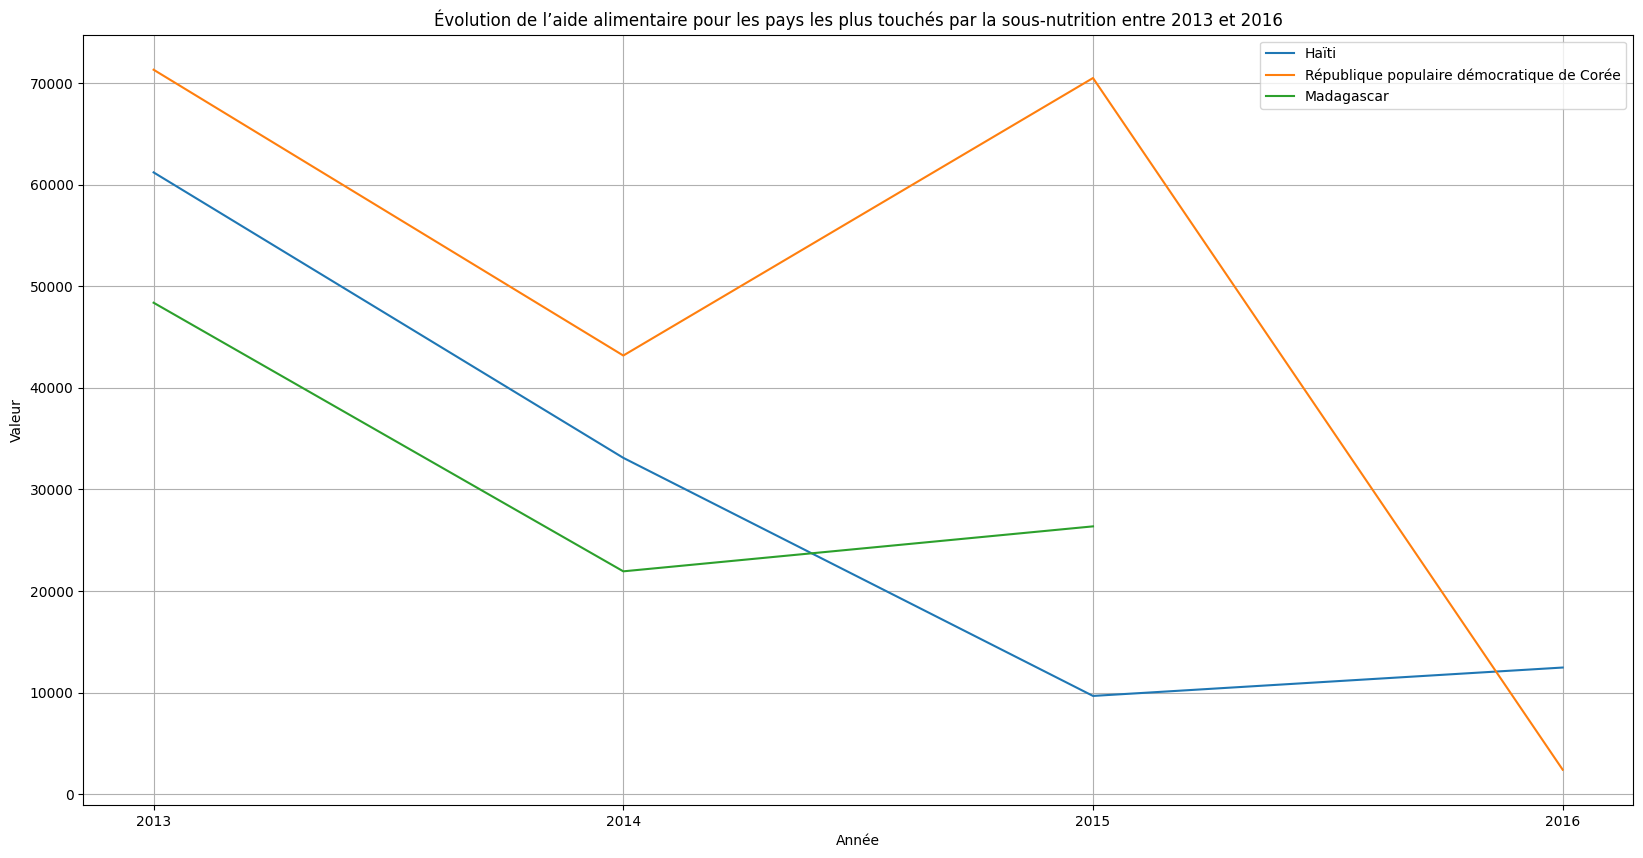

In [281]:
# EVOLUTION DES AIDES POUR LES PAYS LES PLUS TOUCHES PAR LA SOUS-ALIMENTATION
pays_moins_aides = aide_alimentaire.groupby('zone')['valeur'].sum()

# Regrouper les données par année pour les 20 pays et calculez la somme des valeurs pour chaque année
moins_aide = aide_alimentaire[aide_alimentaire['zone'].isin(pays_plus_sous_nutri)].groupby(['annee', 'zone'])['valeur'].sum().unstack()

# Sélectionnez uniquement les 3 pays les plus touchés par la sous-nutrition ['Haïti', 'République populaire démocratique de Corée', 'Madagascar']
moins_aide = moins_aide[pays_plus_sous_nutri]

# Tracez une courbe d'évolution pour chaque pays
plt.figure(figsize=(20, 10))

for zone in pays_plus_sous_nutri:
    plt.plot(moins_aide.index, moins_aide[zone], label=zone)

# Ajoutez un titre au graphique
plt.title("Évolution de l’aide alimentaire pour les pays les plus touchés par la sous-nutrition entre 2013 et 2016")

# Ajoutez des étiquettes d'axe
plt.xlabel('Année')
plt.ylabel('Valeur')

# Spécifiez le format des étiquettes de l'axe des x (sans chiffre après la virgule)
plt.xticks(moins_aide.index.astype(int))

# Ajoutez une légende pour les pays
plt.legend()

# Grille pour la lecture
plt.grid(True)

# Affichez le graphique
plt.show()

CONCLUSION

L'étude sur la sous-nutrition dans le monde, nous a permis de constater que la disponibilité alimentaire permettrait de couvrir les besoins de la population.

La proportion de personnes qui pourraient être nourries avec des produits animaux uniquement est de 22.7 % de la population totale.

La proportion de personnes qui pourraient être nourries avec des produits végétaux uniquement est de 118.1 % de la population totale.

On pourrait en déduire que la consommation de viande n'est profitable que pour 23% de la population. En plus, l'élevage des animaux nécessite une quantité de produits végétaux et surtout de céréales qui serait suffisante pour nourrir la plupart de la population en sous-nutrition.

Plusieurs pays représentant un taux de sous-nutrition alarmant comme Haïti, la Corée du Nord et Madagascar n’ont pas assez d’aide alimentaire pour combler le manque. Cela suggère la mise en question des critères d’attribution des aides alimentaires et la manière dont elles sont distribuées.